In [3]:
# Display all cell outputs
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
from pathlib import Path
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings('ignore')

##Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
import dexplot as dxp
from dateutil import parser
import plotly
# Authenticate with your account
plotly.tools.set_credentials_file(username='####',api_key='###')

import plotly.plotly as py
import plotly.graph_objs as go

# Offline mode
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)


In [4]:
from bnb.data_processing.read import read_csvfile
from bnb.data_analysis.analyze import group_by_date

In [5]:
Data_dir = Path('C:/Users/KBrig/AirBnBRepo/AirBnB/data')
Data_dir

WindowsPath('C:/Users/KBrig/AirBnBRepo/AirBnB/data')

In [6]:
NewYork_CSV = Data_dir/'NewYorkData_clean.csv'
Bangkok_CSV = Data_dir/'BangkokData_clean.csv'
Cairo_CSV = Data_dir/'CairoData_clean.csv'


### NewYork City

In [7]:
NewYorkData = read_csvfile(NewYork_CSV)
NewYorkData.describe()

Accuracy_stars  CheckIn_stars  Cleanliness_stars  Communication_stars  \
count     3957.000000    3957.000000        3957.000000          3957.000000   
mean         4.471443       4.503285           4.369219             4.503033   
std          1.395072       1.401146           1.382541             1.401101   
min          0.000000       0.000000           0.000000             0.000000   
25%          4.500000       5.000000           4.500000             5.000000   
50%          5.000000       5.000000           5.000000             5.000000   
75%          5.000000       5.000000           5.000000             5.000000   
max          5.000000       5.000000           5.000000             5.000000   

          Latitude  Location_stars    Longitude        Price   Super_host  \
count  3957.000000     3957.000000  3957.000000  3957.000000  3957.000000   
mean     40.737994        4.431008   -73.971991   157.393985     0.492039   
std       0.046678        1.386338     0.041711    97.395996     0.500000   
min      40.577700        0.000000   -74.217230    20.000000     0.000000   
25%      40.708720        4.500000   -73.993250    86.000000     0.000000   
50%      40.736640        5.000000   -73.972300   132.000000     0.000000   
75%      40.764370        5.000000   -73.947340   211.000000     1.000000   
max      40.920380        5.000000   -73.770500   792.000000     1.000000   

       Value_stars     ...             Stove           TV  \
count  3957.000000     ...       3957.000000  3957.000000   
mean      4.375916     ...          0.369725     0.678292   
std       1.375024     ...          0.482791     0.467191   
min       0.000000     ...          0.000000     0.000000   
25%       4.500000     ...          0.000000     0.000000   
50%       5.000000     ...          0.000000     1.000000   
75%       5.000000     ...          1.000000     1.000000   
max       5.000000     ...          1.000000     1.000000   

       Table corner guards       Washer   Waterfront         Wifi  \
count          3957.000000  3957.000000  3957.000000  3957.000000   
mean              0.000758     0.342431     0.010867     0.961587   
std               0.027528     0.474583     0.103689     0.192215   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     1.000000   
50%               0.000000     0.000000     0.000000     1.000000   
75%               0.000000     1.000000     0.000000     1.000000   
max               1.000000     1.000000     1.000000     1.000000   

       Window guards  Reviewers_no  normalized_price        month  
count    3957.000000   3957.000000       3957.000000  3957.000000  
mean        0.031084     83.216325          7.869699     6.613596  
std         0.173567     81.895894          4.869800     3.394078  
min         0.000000     -1.000000          1.000000     1.000000  
25%         0.000000     19.000000          4.300000     4.000000  
50%         0.000000     62.000000          6.600000     7.000000  
75%         0.000000    123.000000         10.550000    10.000000  
max         1.000000    586.000000         39.600000    12.000000  

[8 rows x 108 columns]

In [8]:
NewYorkData.head(3)

Accuracy_stars     CheckIn  CheckIn_stars    CheckOut  Cleanliness_stars  \
0             5.0  2019-03-21            5.0  2019-03-26                5.0   
1             4.5  2019-03-21            4.5  2019-03-26                4.0   
2             5.0  2019-03-21            5.0  2019-03-26                5.0   

   Communication_stars  Latitude  Location_stars  Longitude  Price  \
0                  5.0  40.73321             5.0  -74.00242    244   
1                  4.5  40.76580             5.0  -73.95812     62   
2                  5.0  40.75972             4.5  -74.03827     44   

                         ...                          Wifi  Window guards  \
0                        ...                             1              0   
1                        ...                             1              0   
2                        ...                             1              0   

   Reviewers_no                                              Title  \
0            87  *Luxury 1 Bedrm Private Designer Home & Roofdeck*   
1             5        Single Bedroom-Upper East Side-Central Park   
2            83  Quiet room for sleeping - 15 min from Times Sq...   

   normalized_price                geom  month  \
0              12.2  40.73321,-74.00242      3   
1               3.1   40.7658,-73.95812      3   
2               2.2  40.75972,-74.03827      3   

                                             address   neighborhood  \
0  204, West 4th Street, West Village, Manhattan,...   West Village   
1  351, East 68th Street, Lenox Hill, Manhattan, ...     Lenox Hill   
2  582, 12th Street, Union City, Hudson County, N...     Union City   

                                     partial_address  
0   West Village, Manhattan, Manhattan Community ...  
1   Lenox Hill, Manhattan, Manhattan Community Bo...  
2   Union City, Hudson County, New Jersey, 07087,...  

[3 rows x 115 columns]

In [9]:
list(set(NewYorkData.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [10]:
NewYorkData_num = NewYorkData.select_dtypes(include = ['float64', 'int64'])

Let's check the distribution of all numeric features we have! 

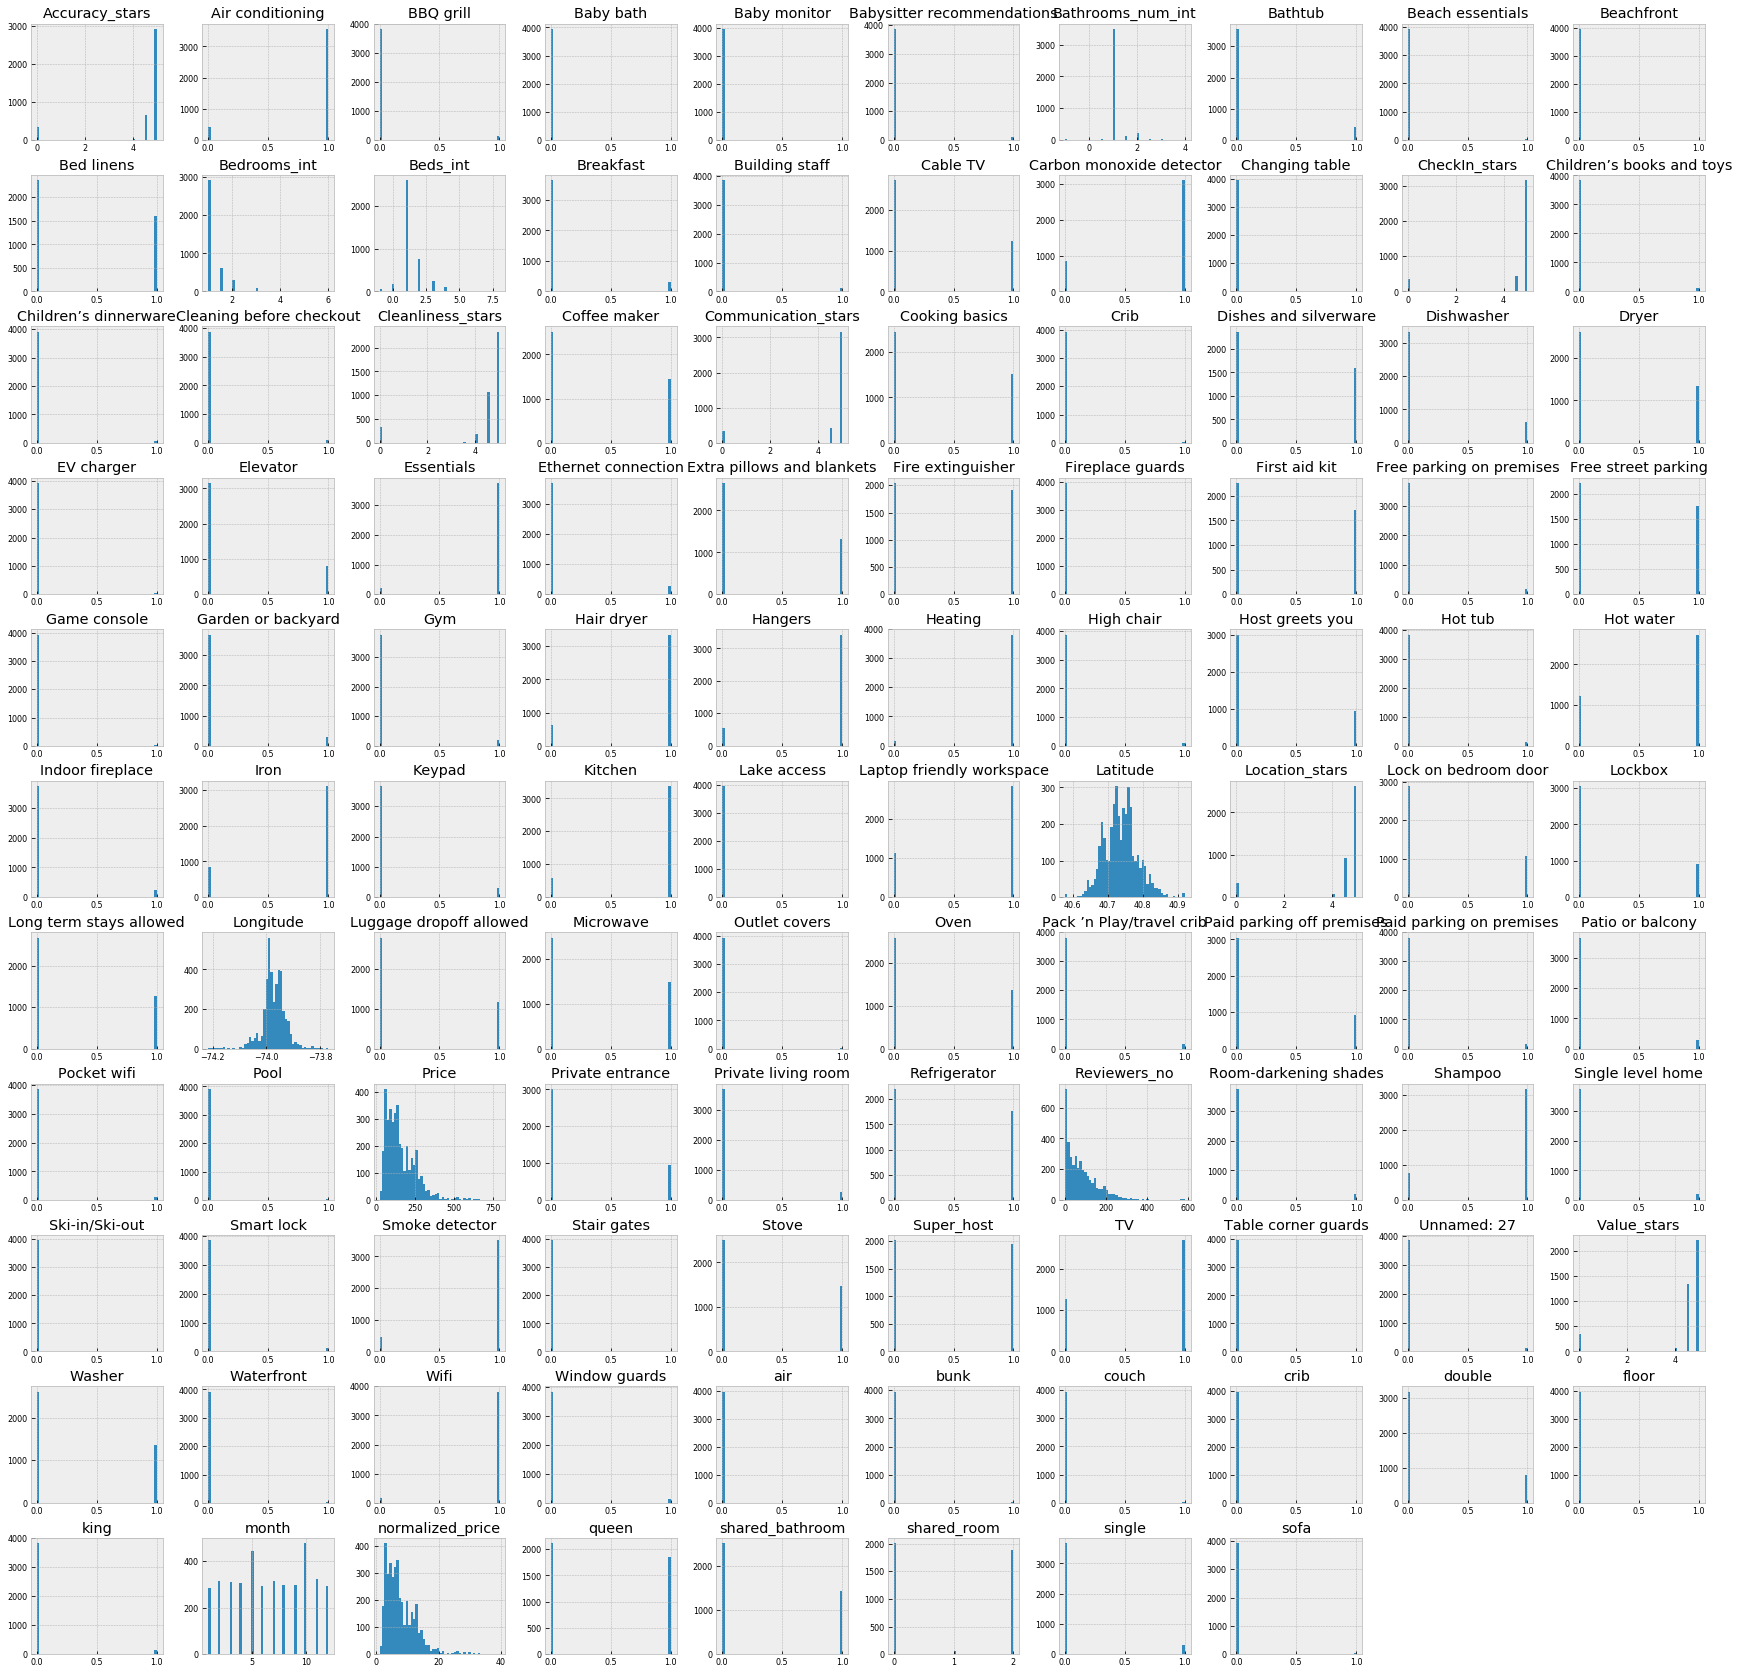

In [11]:
NewYorkData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

## Price Distribution

Skewness: 1.540806
Kurtosis: 3.676482


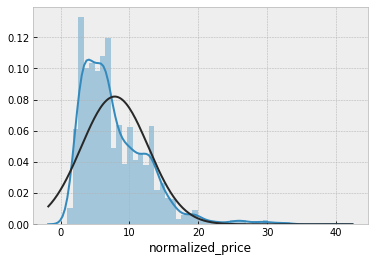

In [12]:
from scipy import stats
from scipy.stats import norm
sns.distplot(NewYorkData['normalized_price'],fit = norm);
#skewness and kurtosis
print("Skewness: %f" % NewYorkData['normalized_price'].skew())
print("Kurtosis: %f" % NewYorkData['normalized_price'].kurt())

As we see, most of the variables here are either binary such as the bed type : king, queen, double,etc or numeric with limited number of vlaues such as the review stars.

That was the individual distribution of different varibales. Let's explore some connections between those variables!


In [13]:
NewYorkData_corr=NewYorkData_num.corr()

In [14]:
NewYorkData_corr['normalized_price'][abs(NewYorkData_corr['normalized_price']) > 0.5]

Price               1.000000
shared_bathroom    -0.509260
Bedrooms_int        0.514716
shared_room        -0.630456
normalized_price    1.000000
Name: normalized_price, dtype: float64

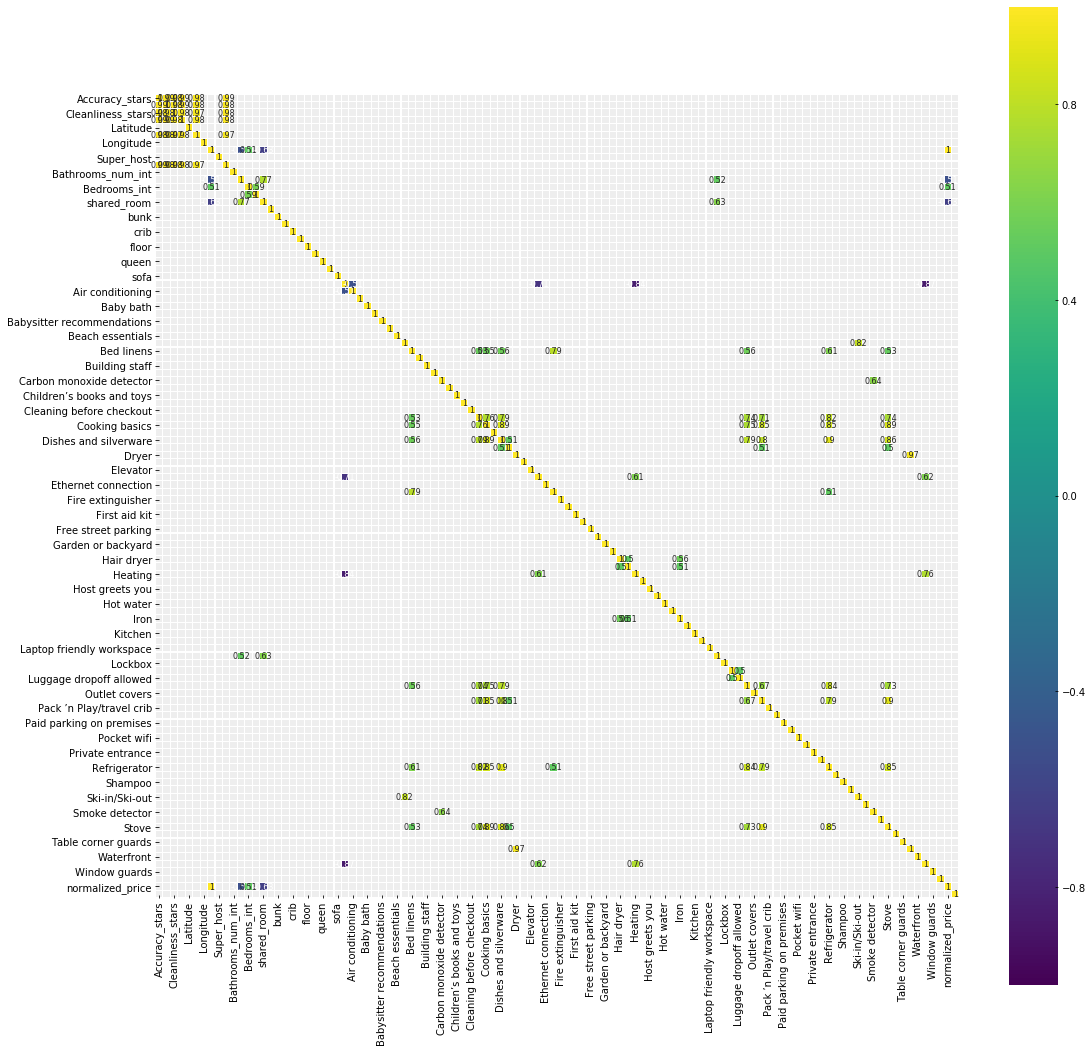

In [19]:
plt.figure(figsize=(18, 18))
sns.heatmap(NewYorkData_corr[abs(NewYorkData_corr) >= 0.5], cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

It seems that we have a pretty clear correlation between the average price and the parameters charactarizing the size of the apartment/house and the sharing/privacy of those properties.

### Let's zoom it out!!

In [16]:
NewYorkData_size= NewYorkData[['normalized_price','Bedrooms_int','Beds_int','Bathrooms_num_int']]

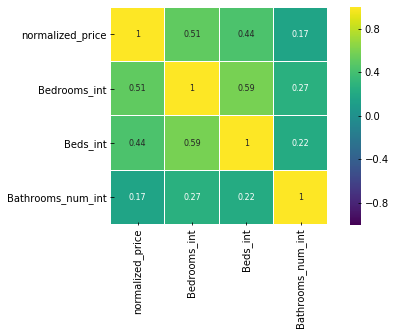

In [17]:
plt.figure(figsize=(8, 4))
sns.heatmap(NewYorkData_size.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

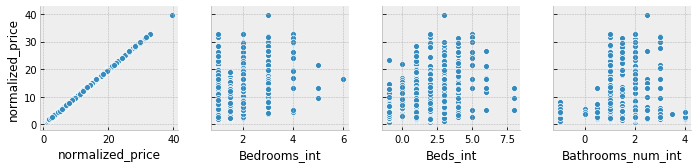

In [18]:
sns.pairplot(data=NewYorkData_size, x_vars=NewYorkData_size.columns,y_vars=['normalized_price'])

### Can sharing a room or bathroom affect the correponding price?

In [21]:
NewYorkData_sharing = NewYorkData[['normalized_price','shared_room','shared_bathroom', 'Super_host']]

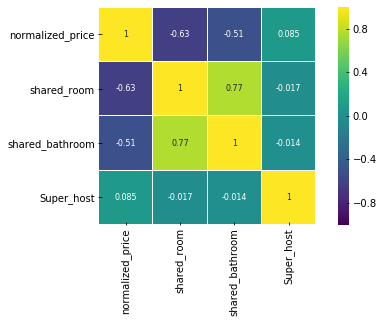

In [22]:
plt.figure(figsize=(8,4))
sns.heatmap(NewYorkData_sharing.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### What's about the reviews' history?

In [23]:
NewYorkData_review = NewYorkData[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]

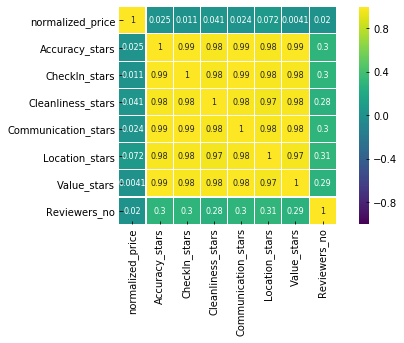

In [24]:
plt.figure(figsize=(8,4))
sns.heatmap(NewYorkData_review.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

### Price vs. Bed Type

In [25]:
NewYorkData_BedType = NewYorkData[['normalized_price','air', 'bunk', 'couch', 'crib', 'double', 'floor', 'king', 'queen','single', 'sofa']]

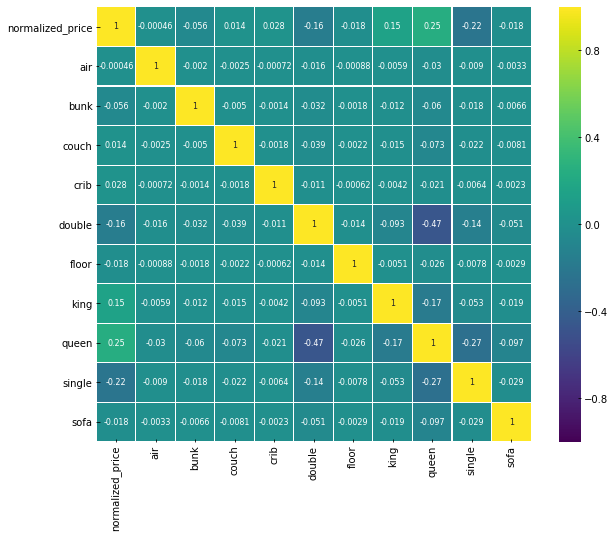

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(NewYorkData_BedType.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True);

## Price vs. available amenities

### Let's see first which amenities are most frequent in New York homes at Airbnb market!

In [6]:
NewYorkData_original = read_csvfile('C:/Users/KBrig/AirBnBRepo/AirBnB/data/AirBnBNY.csv')

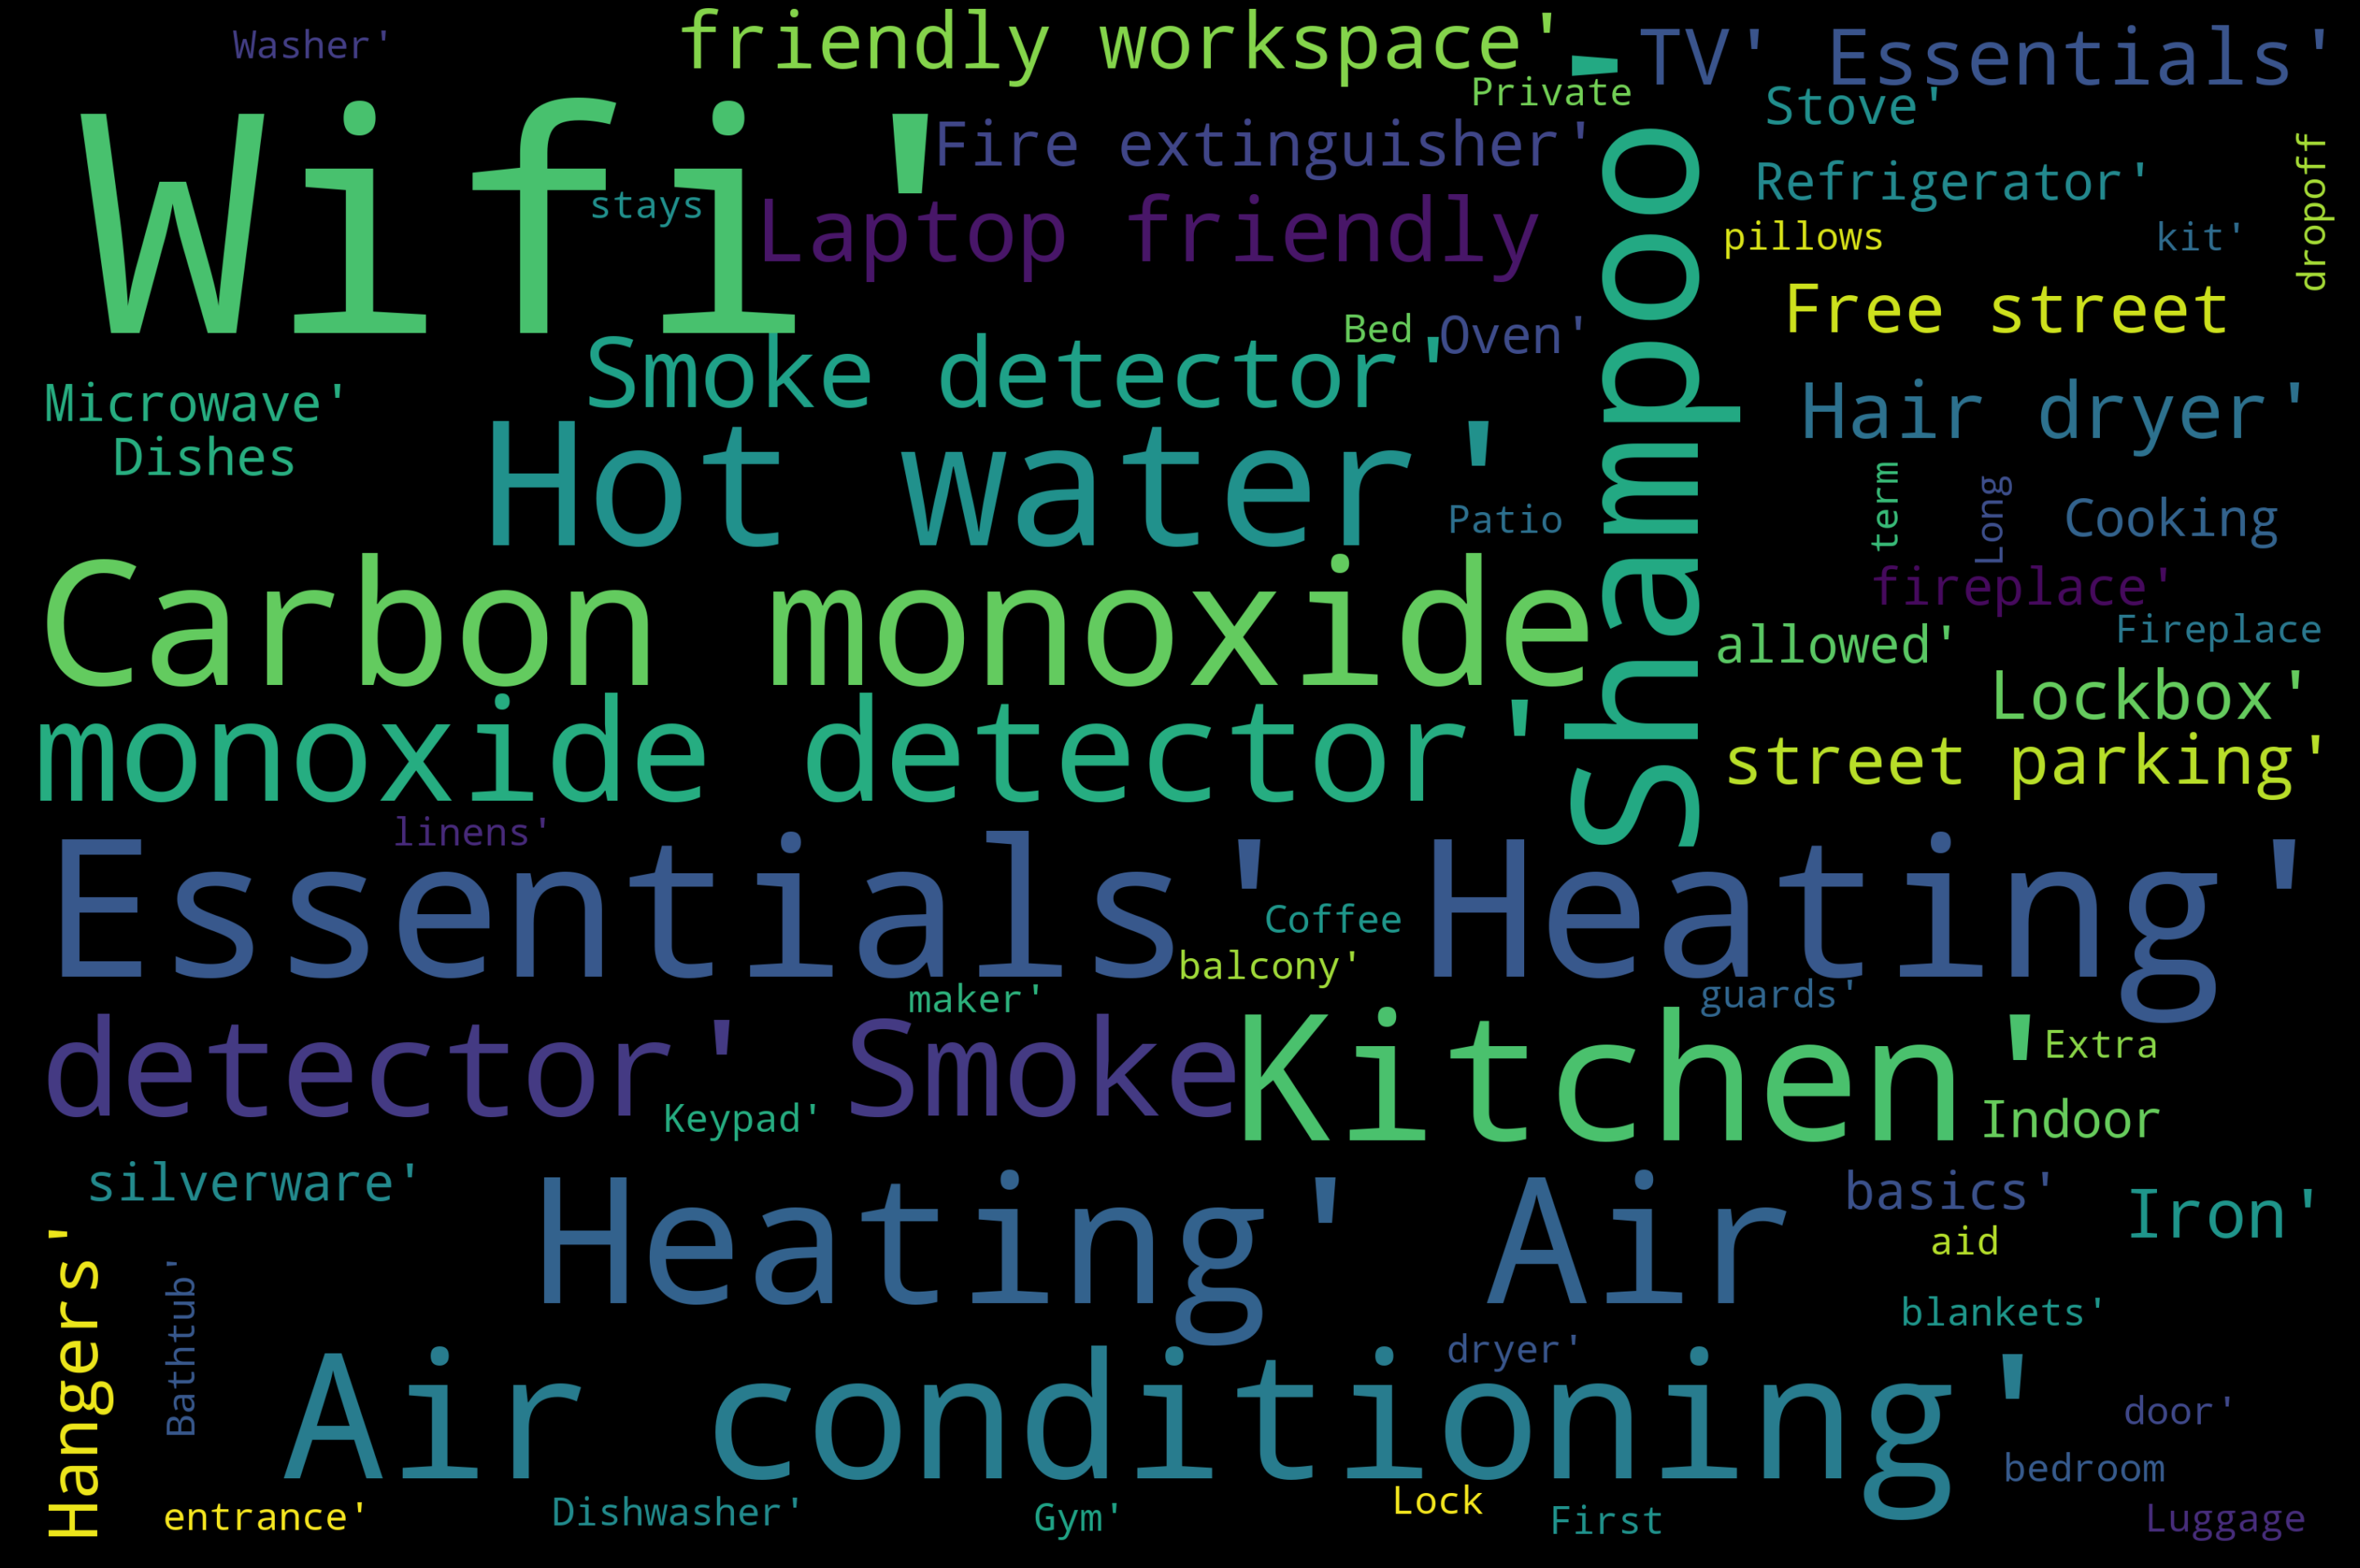

In [7]:
from wordcloud import WordCloud, STOPWORDS

text = NewYorkData_original.Amenities.values

wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'black',stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(figsize = (40, 30),facecolor = 'k',edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The size of those words in the cloud plot reflects the importance or frequency of having them in NewYork homes!

However, which amenity can affect the price?

In [17]:
NewYork_amenities_list = NewYorkData.columns[-87:-8]

In [18]:
NewYorkData_amenities = NewYorkData[NewYork_amenities_list]


In [19]:
NewYorkData_amenities['normalized_price'] = NewYorkData['normalized_price']

In [20]:
NewYorkData_amenities.corr()['normalized_price'][abs(NewYorkData_amenities.corr()['normalized_price']) > 0.2]


Cable TV                0.215269
Lock on bedroom door   -0.415665
TV                      0.278207
normalized_price        1.000000
Name: normalized_price, dtype: float64

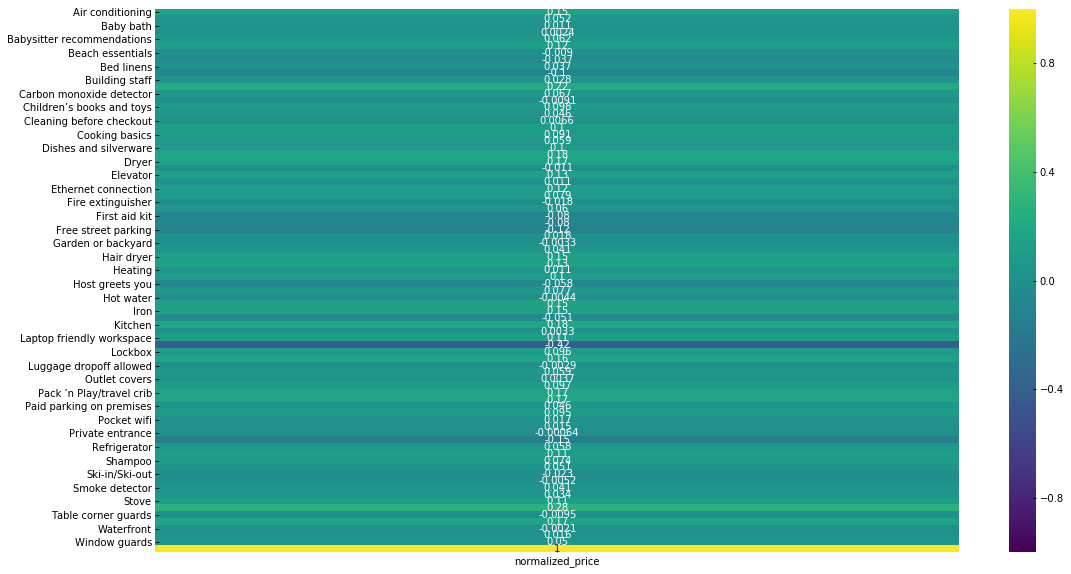

In [22]:
plt.figure(figsize=(18,10))
sns.heatmap(NewYorkData_amenities.corr()[['normalized_price']],vmax=1.0, vmin=-1.0, cmap='viridis', annot=True);

## Price vs. Location

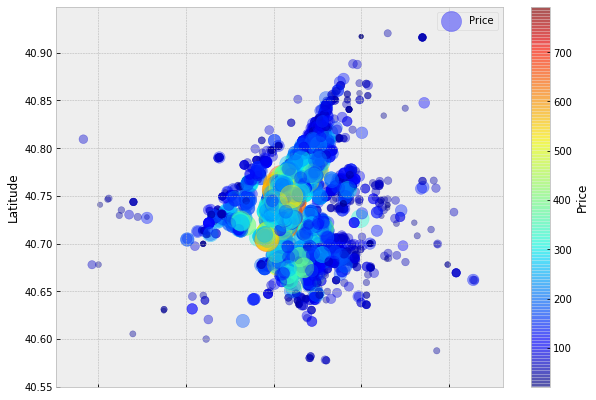

In [28]:
NewYorkData.plot(kind="scatter", x="Longitude", y="Latitude",s=NewYorkData['Price'], label="Price", c="Price", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7),)
plt.legend()
plt.show()



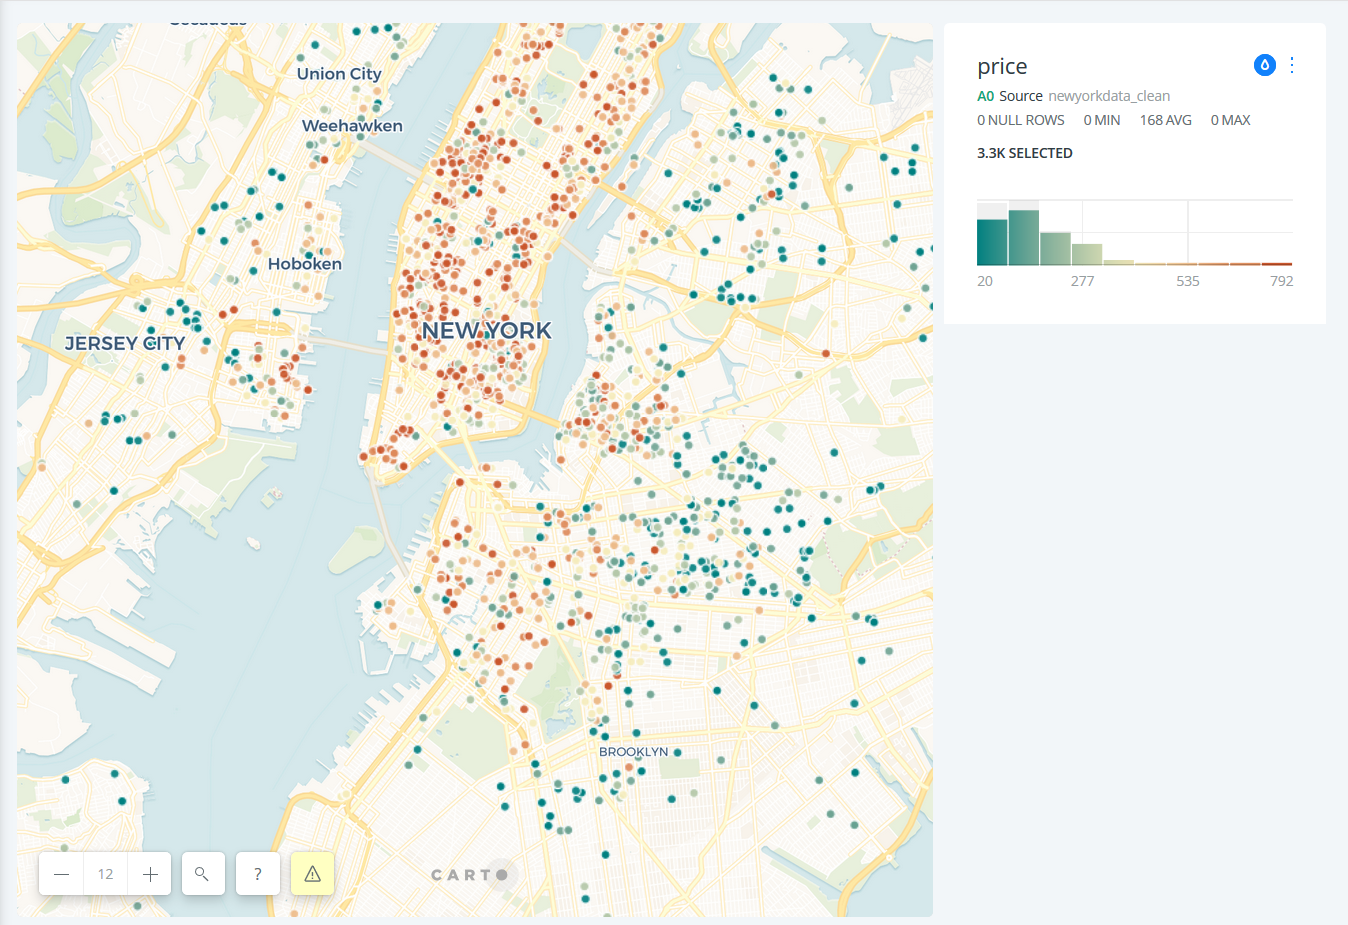

In [13]:
from IPython.display import Image
Image("img\PriceVs.LocationNY.PNG")

So, as expected, it is pretty clear that the average renting price gets higher as we get closer to the center of New York!

## Same neighborhood

In [7]:
same_neighborhood_homes = NewYorkData

In [8]:
same_neighborhood_homes.neighborhood.nunique()

273

That says that our data are distributed over 273 neighborhoods!

In [9]:
same_neighborhood_homes['neighborhood'].head()

0                 West Village
1                   Lenox Hill
2                   Union City
3          Morningside Heights
4     Eleanor Roosevelt Houses
Name: neighborhood, dtype: object

Which neighborhoods are more dense with Airbnb homes?!

In [10]:
same_neighborhood_homes.neighborhood.value_counts().head(10)

 Williamsburg       180
 Hell's Kitchen     139
 Chelsea            109
 East Harlem         96
 Harlem              94
 Upper West Side     87
 Bed-Stuy            85
 Clinton Hill        84
 Greenpoint          84
 Park Slope          84
Name: neighborhood, dtype: int64

Let's check the average renting price of different neighborhoods of New York!!

In [21]:
same_neighborhood_homes.groupby('neighborhood')['Price'].mean()

neighborhood
  Manhattan Valley                                                     102.000000
 Alphabet City                                                         182.792683
 Arrochar                                                               46.000000
 Astoria                                                                84.000000
 BEDFORD STUYVESANT/ EXPANDED STUYVEVSANT HEIGHTS HISTORIC DISTRICT     98.476190
 Bay Ridge                                                             136.250000
 Bed-Stuy                                                              117.411765
 Bed-Stuy Gateway Business Improvement District                        149.666667
 Bedford Park                                                           79.000000
 Boerum Hill                                                           162.411765
 Boerum Hill Historic District                                         180.000000
 Brighton Beach                                                         54.400000
 Br

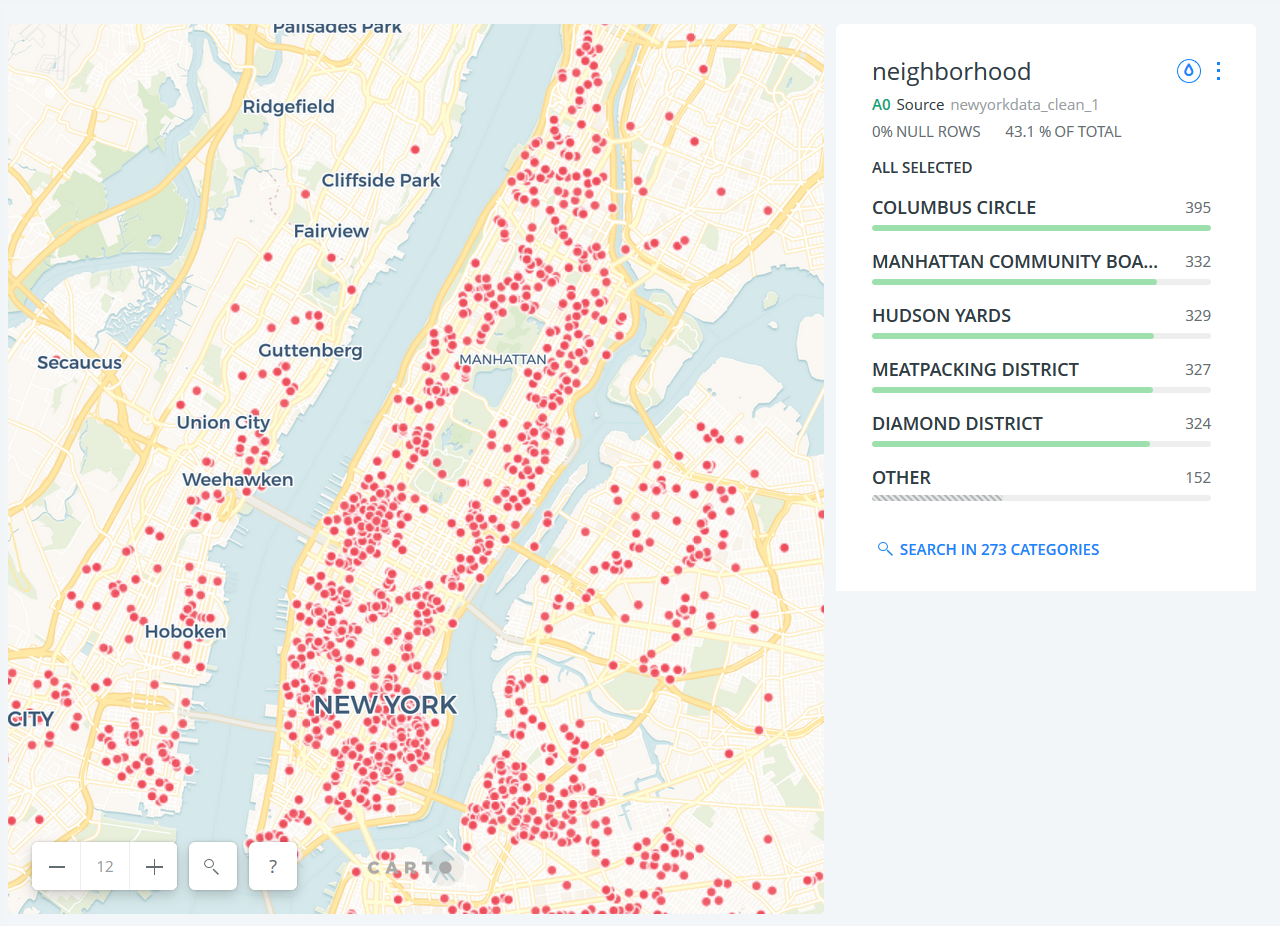

In [14]:
Image("img/AvgPrice_neighborhood.PNG")

In [12]:
same_neighborhood_homes[same_neighborhood_homes.Price > 300].neighborhood.unique()

array([" Hell's Kitchen", ' Chinatown', ' Chelsea', ' Five Points',
       ' Lenox Hill', ' Diamond District', ' Manhattan', ' Times Square',
       ' West Village', ' Columbus Circle', ' Gowanus Houses',
       ' Greenpoint', ' Williamsburg', ' Garment District',
       ' Financial District', ' Hudson Square', ' Upper East Side',
       ' Lincoln Harbor', ' Maspeth',
       'Brooklyn Community Board 17 Neighborhoods',
       'Downtown Jersey City', ' Gowanus', ' East Village',
       ' Upper West Side', ' Flatiron District', ' Alphabet City',
       ' Korea Town', ' Park Slope', 'East Village', ' Tudor City',
       ' Lower East Side', ' Fort Greene', ' Midtown East',
       ' Manhattan Community Board 3', ' Prospect Heights',
       'Lower East Side', ' Midtown South', ' Turtle Bay',
       ' Carroll Gardens', ' Hudson Yards', ' Bed-Stuy', ' Kips Bay',
       'Upper West Side', ' Murray Hill', ' Newport', ' SoHo',
       'Battery Park City', ' Hoboken', 'Times Square', ' DUMBO',
    

In [43]:
#same_neighborhood_homes['Group_ID'] = same_neighborhood_homes.groupby(['neighborhood']).grouper.group_info[0]
#same_neighborhood_homes.reset_index(inplace=True)
#same_neighborhood_homes.sort_index(by ='Group_ID',inplace = True)

### Price over Time

In [16]:
AvgPrice_NY = group_by_date(NewYorkData)

In [17]:
#reate a data object
price_data = go.Scatter(x=AvgPrice_NY.index,y=AvgPrice_NY.values)

#set up the plot layout
layout1 = go.Layout(title='NY_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig1 = go.Figure(data=[price_data],layout=layout1)


#display the plot interactively
iplot(fig1)

Note: I am not sure what kind of recommendation we can give from this plot!! The average price is increasing over time however we did not try scrping data from different points of time to judge that!

## Are there some special months for Airbnb market?

Note: Ordered as M/Y : 01/2020, 02/2020, 03/2019, 04/2019, 05/2019, 06/2019, 07/2019, 08/2019, 09/2019, 10/2019, 11/2019, 12/2019

### Density of observations per month


In [23]:
NewYorkData.CheckIn.unique()


array(['2019-03-21', '2019-04-18', '2019-05-16', '2019-06-13',
       '2019-07-11', '2019-08-08', '2019-09-05', '2019-10-03',
       '2019-10-31', '2019-11-28', '2019-12-26', '2020-01-23',
       '2020-02-20', '2019-03-07', '2019-04-04', '2019-05-02',
       '2019-05-30', '2019-06-27', '2019-07-25', '2019-08-22',
       '2019-09-19', '2019-10-17', '2019-11-14', '2019-12-12',
       '2020-01-09', '2020-02-06'], dtype=object)

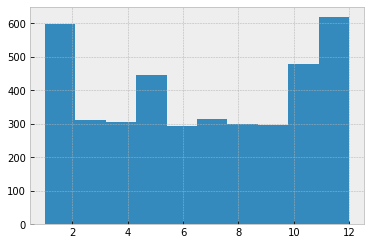

In [24]:
NewYorkData['month'].hist()

### Price range per month

In [25]:
for i, j,k in zip(NewYorkData.groupby('month')['Price'].min(),NewYorkData.groupby('month')['Price'].mean(),NewYorkData.groupby('month')['Price'].max()):
    print(i,int(j),k)


36 196 658
36 195 658
25 94 300
23 102 429
21 121 586
20 136 654
33 155 561
30 164 500
20 192 658
32 172 619
36 187 792
20 182 598


# Posting_IDs Aggregation!!

In [26]:
unique_homes_NY = NewYorkData

In [27]:
unique_homes_NY.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).size()

Latitude  Longitude  Title                                                                Bedrooms_int  Bathrooms_num_int
40.57770  -73.93988  Mini Studio in NY city safest area                                   1.0            1.0                 2
40.57821  -73.94122  Private Studio, Oceanside beautiful and safe area                    1.0            1.0                 1
40.57973  -73.95799  Your Own Personal Heaven                                             1.0            1.0                 1
40.58012  -73.95896  Private room for two (1)                                             1.0            1.0                 2
40.58198  -73.95770  Private Room w/ private bath                                         1.0            1.0                 2
40.60000  -74.07700  Private Room For 1 w/ Separate Entrance Student / Intern / Traveler  1.0            1.0                 1
40.60541  -74.16074  Big Private w/ Queen size bed, wardrobe desk chair                   1.0            1.0        

In [10]:
#NewYorkData.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).ngroup()

In [29]:
unique_homes_NY['Group_ID'] = unique_homes_NY.groupby(['Latitude','Longitude','Title','Bedrooms_int', 'Bathrooms_num_int']).grouper.group_info[0]

In [31]:
unique_homes_NY.reset_index(inplace=True)

In [33]:
unique_homes_NY.sort_index(by =['Group_ID','CheckIn'],inplace = True)

In [35]:
unique_homes_NY.Group_ID.unique()


array([  -1,    0,    1, ..., 1871, 1872, 1873], dtype=int64)

In [38]:
def price_trend(L):
    if all(x<y for x, y in zip(L, L[1:])):
        return('strictly_increasing')
    elif(all(x>y for x, y in zip(L, L[1:]))):
        return('strictly_decreasing')
    elif(all(x==y for x, y in zip(L, L[1:]))):
        return('no change')
    elif((all(x<y for x, y in zip(L, L[1:]))) or (all(x>y for x, y in zip(L, L[1:])))):
        return('monotonic')
    else:
        return('up-down')
        
    

In [39]:
unique_homes_NY['home_renting_trend']=-1
for i,j in enumerate(unique_homes_NY.Group_ID):
    if(j ==-1):
         unique_homes_NY['home_renting_trend'][i]= 'appeared_once'
    elif(unique_homes_NY[unique_homes_NY.Group_ID ==j].Group_ID.count()>1):
        unique_homes_NY['home_renting_trend'][i]= price_trend(unique_homes_NY[unique_homes_NY.Group_ID==j].Price)

In [41]:
unique_homes_NY['home_renting_trend'].replace(-1,'appeared_once', inplace=True)

In [43]:
unique_homes_NY['home_renting_trend'].unique()

array(['appeared_once', 'strictly_increasing', 'strictly_decreasing',
       'no change', 'up-down'], dtype=object)

In [44]:
unique_homes_NY[unique_homes_NY.Group_ID==1854]

level_0  index  Accuracy_stars    CheckIn  CheckIn_stars   CheckOut  \
3925     2315   2315             5.0 2019-05-02            4.0 2019-05-07   
3926     2488   2488             5.0 2019-05-30            4.0 2019-06-04   
3927      543    543             5.0 2019-06-13            4.0 2019-06-18   

      Cleanliness_stars  Communication_stars  Latitude  Location_stars  \
3925                4.5                  4.5  40.85127             5.0   
3926                4.5                  4.5  40.85127             5.0   
3927                4.5                  4.5  40.85127             5.0   

            ...          Washer  Waterfront  Wifi  Window guards  \
3925        ...               0           0     1              0   
3926        ...               0           0     1              0   
3927        ...               0           0     1              0   

      Reviewers_no                      Title  normalized_price  Group_ID  \
3925             6  Great value in Manhattan!          0.159836      1854   
3926             6  Great value in Manhattan!          0.159836      1854   
3927             6  Great value in Manhattan!          0.163934      1854   

      home_renting_trend  Super_host_string  
3925             up-down                not  
3926             up-down                not  
3927             up-down                not  

[3 rows x 115 columns]

In [45]:
unique_homes_NY['Super_host_string'] =unique_homes_NY.Super_host.map({1:'Super',0:'not'})

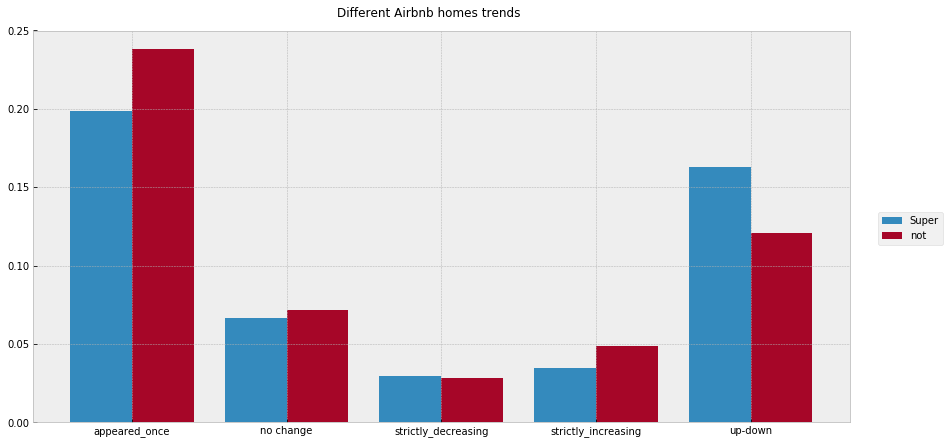

In [46]:
dxp.aggplot('home_renting_trend', data=unique_homes_NY,hue='Super_host_string' ,normalize='all',ylabel="Percentage of homes",title="Different Airbnb homes trends")

So it looks that we have different trends for the average price among different homes: "appeared_once" for homes that are posted once. Also,we see the price being fixed for some homes. More other patterns are also detected with other observations showing that the price is strictly_increasing,strictly_decreasing, or up_down!   

# Correlation/ Holding other variables constant

In [23]:
fixed_size_homes_NY = NewYorkData

### What sizes we have in our data?! 

In [25]:
fixed_size_homes_NY.Bedrooms_int.unique()

array([1. , 1.5, 2. , 3. , 4. , 5. , 6. ])

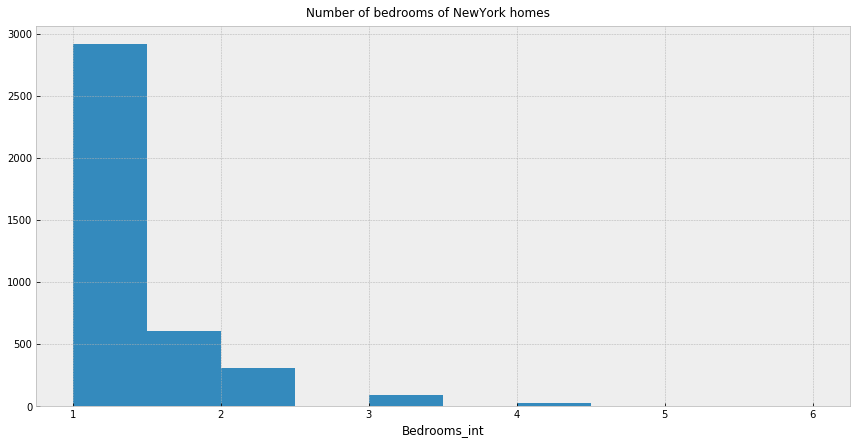

In [26]:
dxp.aggplot('Bedrooms_int', data=fixed_size_homes_NY ,kind='hist',ylabel="Percentage of homes",title="Number of bedrooms of NewYork homes")

In [27]:
fixed_size_homes_NY['Group_ID'] = fixed_size_homes_NY .groupby(['Bedrooms_int']).grouper.group_info[0]

In [61]:
fixed_size_homes_NY.head(3)

index  Accuracy_stars     CheckIn  CheckIn_stars    CheckOut  \
0      0             5.0  2019-03-21            5.0  2019-03-26   
1   2049             0.0  2019-03-07            0.0  2019-03-12   
2   2050             5.0  2019-03-07            5.0  2019-03-12   

   Cleanliness_stars  Communication_stars  Latitude  Location_stars  \
0                5.0                  5.0  40.73321             5.0   
1                0.0                  0.0  40.73181             0.0   
2                5.0                  5.0  40.82484             5.0   

   Longitude    ...     Window guards  Reviewers_no  \
0  -74.00242    ...                 0            87   
1  -74.00606    ...                 0            -1   
2  -73.95260    ...                 0            26   

                                               Title  normalized_price  \
0  *Luxury 1 Bedrm Private Designer Home & Roofdeck*             12.20   
1  WEST VILLAGE Bohemian flat in neo-Tudor town h...              9.40   
2                     HUGE 18x19 room. 10’ ceiling A              2.95   

                          geom  month  \
0           40.73321,-74.00242      3   
1  40.73181,-74.00605999999998      3   
2            40.82484,-73.9526      3   

                                             address       neighborhood  \
0  204, West 4th Street, West Village, Manhattan,...       West Village   
1  72, Barrow Street, West Village, Manhattan, Ma...       West Village   
2  605, West 142nd Street, Hamilton Heights, Manh...   Hamilton Heights   

                                     partial_address  Group_ID  
0   West Village, Manhattan, Manhattan Community ...         0  
1   West Village, Manhattan, Manhattan Community ...         0  
2   Hamilton Heights, Manhattan, Manhattan Commun...         0  

[3 rows x 117 columns]

In [29]:
fixed_size_homes_NY.sort_index(by =['Group_ID'],inplace = True)

In [31]:
fixed_size_homes_NY[fixed_size_homes_NY.Group_ID ==-1]['Bedrooms_int'].head(20)

Series([], Name: Bedrooms_int, dtype: float64)

In [32]:
fixed_size_homes_NY.reset_index(inplace=True)

In [34]:
fixed_size_homes_NY.Group_ID.unique()


array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [35]:
fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 1]['Bedrooms_int'].unique()

array([1.5])

In [36]:
Studio_apartment= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 1]
one_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 0] 
two_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 2]
three_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 3]
four_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 4]
five_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 5]
six_bed_homes= fixed_size_homes_NY[fixed_size_homes_NY.Group_ID == 6]

In [37]:
one_bed_homes_review = one_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
two_bed_homes_review = two_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
three_bed_homes_review = three_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
four_bed_homes_review = four_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
five_bed_homes_review = five_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
six_bed_homes_review = six_bed_homes[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]
studio_homes_review = Studio_apartment[['normalized_price', 'Accuracy_stars','CheckIn_stars','Cleanliness_stars','Communication_stars','Location_stars','Value_stars','Reviewers_no']]


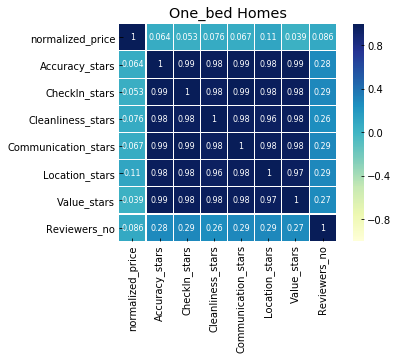

In [38]:
ax = plt.axes()
sns.heatmap(one_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('One_bed Homes')
plt.show()

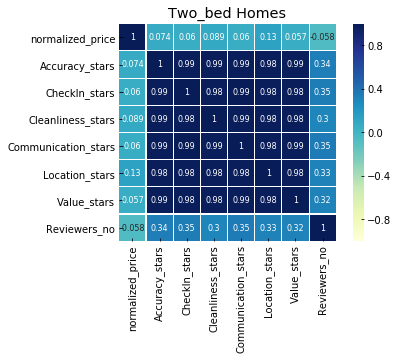

In [39]:
ax = plt.axes()
sns.heatmap(two_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Two_bed Homes')
plt.show()

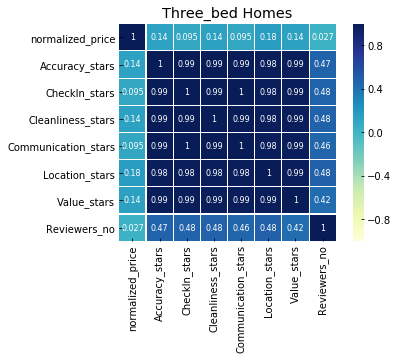

In [40]:
ax = plt.axes()
sns.heatmap(three_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Three_bed Homes')
plt.show()

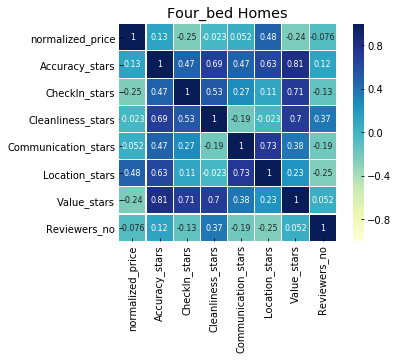

In [41]:
ax = plt.axes()
sns.heatmap(four_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Four_bed Homes')
plt.show()

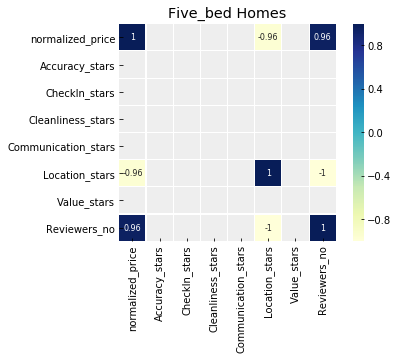

In [42]:
ax = plt.axes()
sns.heatmap(five_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Five_bed Homes')
plt.show()

In [43]:
five_bed_homes_review

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
3953              9.50             5.0            5.0                5.0   
3954             13.05             5.0            5.0                5.0   
3955             21.45             5.0            5.0                5.0   

      Communication_stars  Location_stars  Value_stars  Reviewers_no  
3953                  5.0             5.0          5.0            12  
3954                  5.0             5.0          5.0            12  
3955                  5.0             4.5          5.0            89

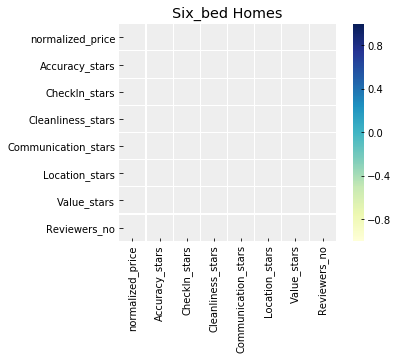

In [44]:
ax = plt.axes()
sns.heatmap(six_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Six_bed Homes')
plt.show()

In [45]:
six_bed_homes_review

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
3956              16.6             0.0            0.0                0.0   

      Communication_stars  Location_stars  Value_stars  Reviewers_no  
3956                  0.0             0.0          0.0             2

In [46]:
NewYorkData.iloc[3956]

index                                                                    1889
Accuracy_stars                                                              0
CheckIn                                                            2020-02-20
CheckIn_stars                                                               0
CheckOut                                                           2020-02-25
Cleanliness_stars                                                           0
Communication_stars                                                         0
Latitude                                                              40.7276
Location_stars                                                              0
Longitude                                                            -74.0441
Price                                                                     332
Super_host                                                                  0
Value_stars                                                     

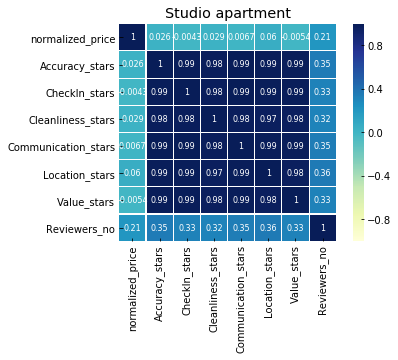

In [47]:
ax = plt.axes()
sns.heatmap(studio_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax);
ax.set_title('Studio apartment')
plt.show()

ValueError: not enough values to unpack (expected 7, got 3)

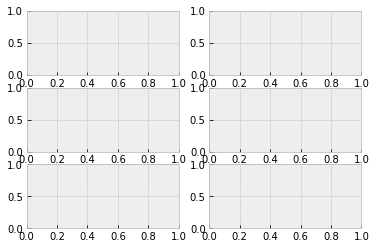

In [107]:
f,(ax1,ax2,ax3,ax4,ax5,ax6,axcb) = plt.subplots(3,2)
ax1.get_shared_y_axes().join(ax2,ax3,ax4,ax5,ax6)
g1 = sns.heatmap(one_bed_homes_review.corr(),cmap='YlGnBu', annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(two_bed_homes_review.corr(),cmap='YlGnBu', annot=True, annot_kws={"size": 8}, square=True, cbar=False,ax=ax2)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(three_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax3)

g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])
g4=sns.heatmap(four_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax4)
g5=sns.heatmap(five_bed_homes_review.corr(),cmap='YlGnBu',  vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True,cbar=False, ax= ax5)
g6=sns.heatmap(six_bed_homes_review.corr(),cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True, ax= ax6,cbar_ax=axcb)

for ax in [g1,g2,g3,g4,g5,g6]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)

plt.show()

In [52]:
fixed_size_homes_NY.columns

Index(['index', 'Accuracy_stars', 'CheckIn', 'CheckIn_stars', 'CheckOut',
       'Cleanliness_stars', 'Communication_stars', 'Latitude',
       'Location_stars', 'Longitude',
       ...
       'Window guards', 'Reviewers_no', 'Title', 'normalized_price', 'geom',
       'month', 'address', 'neighborhood', 'partial_address', 'Group_ID'],
      dtype='object', length=117)

## Review Stars with fixed-size homes

In [55]:
ReviewStarsNY_List = ['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars','Communication_stars', 'Location_stars', 'Value_stars']

In [57]:
ReviewStarsNY = NewYorkData[ReviewStarsNY_List]
ReviewStarsNY['normalized_price'] = NewYorkData['normalized_price']
ReviewStarsNY['Bedrooms_int'] = NewYorkData['Bedrooms_int']
ReviewStarsNY.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            5.0             5.0                5.0                  5.0   
1            0.0             0.0                0.0                  0.0   
2            5.0             5.0                5.0                  5.0   
3            5.0             5.0                5.0                  5.0   
4            0.0             0.0                0.0                  0.0   

   Location_stars  Value_stars  normalized_price  Bedrooms_int  
0             5.0          4.5             12.20           1.0  
1             0.0          0.0              9.40           1.0  
2             5.0          5.0              2.95           1.0  
3             5.0          4.5              3.65           1.0  
4             0.0          0.0              1.65           1.0

In [58]:
bins = [0,0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
names = ['_0.5', '_1', '_1.5','_2','_2.5','_3','_3.5','_4','_4.5','_5']

ReviewStarsNY['AccuracyStars_interval']= pd.cut(ReviewStarsNY['Accuracy_stars'], bins, labels=names)
ReviewStarsNY['LocationStars_interval']= pd.cut(ReviewStarsNY['Location_stars'], bins, labels=names)
ReviewStarsNY['CheckInStars_interval']= pd.cut(ReviewStarsNY['CheckIn_stars'], bins, labels=names)
ReviewStarsNY['ValueStars_interval']= pd.cut(ReviewStarsNY['Value_stars'], bins, labels=names)
ReviewStarsNY['CommunicationStars_interval']= pd.cut(ReviewStarsNY['Communication_stars'], bins, labels=names)
ReviewStarsNY['CleanlStars_interval']= pd.cut(ReviewStarsNY['Cleanliness_stars'], bins, labels=names)


In [49]:
ReviewStarsNY.head()

normalized_price  Accuracy_stars  CheckIn_stars  Cleanliness_stars  \
0             12.20             5.0            5.0                5.0   
1              9.40             0.0            0.0                0.0   
2              2.95             5.0            5.0                5.0   
3              3.65             5.0            5.0                5.0   
4              1.65             0.0            0.0                0.0   

   Communication_stars  Location_stars  Value_stars  Reviewers_no  \
0                  5.0             5.0          4.5            87   
1                  0.0             0.0          0.0            -1   
2                  5.0             5.0          5.0            26   
3                  5.0             5.0          4.5            92   
4                  0.0             0.0          0.0            -1   

  AccuracyStars_interval LocationStars_interval CheckInStars_interval  \
0                     _5                     _5                    _5   
1                    NaN                    NaN                   NaN   
2                     _5                     _5                    _5   
3                     _5                     _5                    _5   
4                    NaN                    NaN                   NaN   

  ValueStars_interval CommunicationStars_interval CleanlStars_interval  
0                _4.5                          _5                   _5  
1                 NaN                         NaN                  NaN  
2                  _5                          _5                   _5  
3                _4.5                          _5                   _5  
4                 NaN                         NaN                  NaN

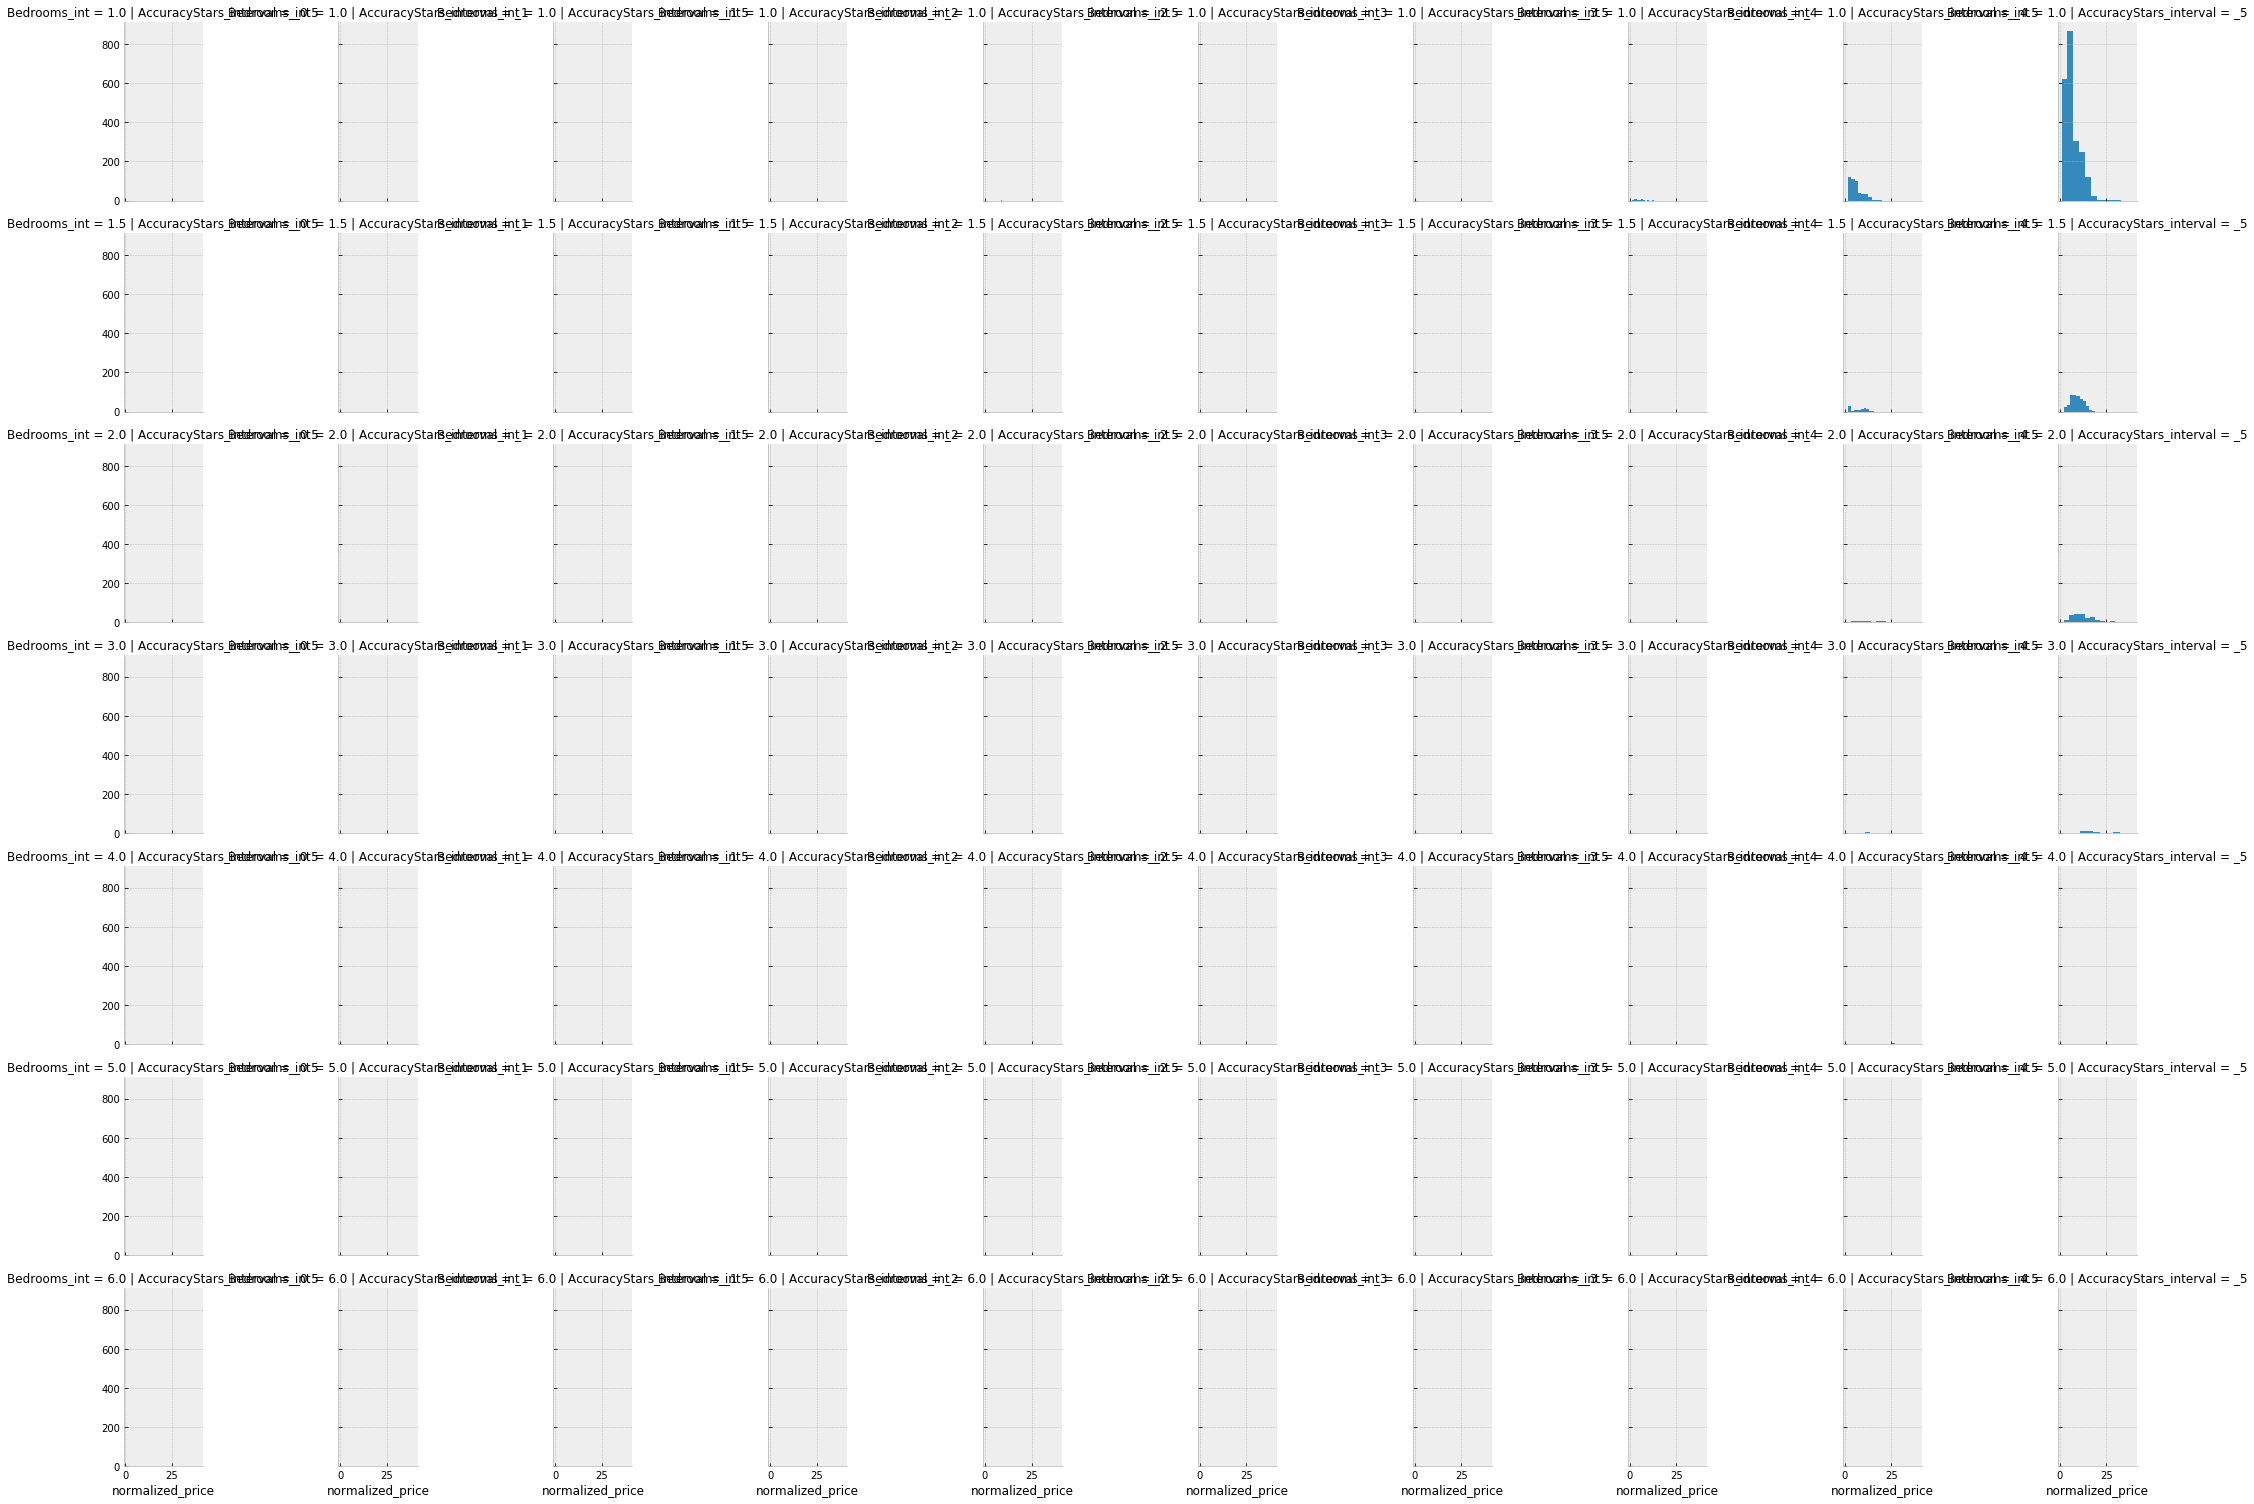

In [59]:
g = sns.FacetGrid(ReviewStarsNY, col='AccuracyStars_interval',row='Bedrooms_int')
g = g.map(plt.hist, "normalized_price")

It looks that most clients tend to give the same number of stars for all classes (i.e, Communication, Cleanilness, CheckIn,etc) which results in a semi-flat rate for number of stars within the same observation. So we do not have that much diversity for the number of stars. Most of the reviews have 4 to 5 stars or in the worst case 0 "No reviews yet"!

### Bangkok

In [ ]:
BangkokData = read_csvfile(Bangkok_CSV)
BangkokData.info()
BangkokData.head()
list(set(BangkokData.dtypes.tolist()))
BangkokData_num = BangkokData.select_dtypes(include = ['float64', 'int64'])
BangkokData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

In [126]:
BangkokData_corr= BangkokData_num.corr()
BangkokData_corr

Price  Latitude  Longitude  Beds_int  \
Price                       1.000000  0.065769  -0.092433  0.436478   
Latitude                    0.065769  1.000000  -0.185423  0.063465   
Longitude                  -0.092433 -0.185423   1.000000 -0.073556   
Beds_int                    0.436478  0.063465  -0.073556  1.000000   
Bedrooms_int                0.567879  0.006806  -0.067759  0.571012   
Bathrooms_num_int           0.408320  0.019517  -0.065525  0.580281   
shared_room                -0.179574  0.016123   0.048833 -0.074554   
shared_bathroom            -0.149778 -0.042205  -0.023281  0.041484   
Super_host                  0.180583 -0.010558  -0.129979  0.104659   
CheckIn_stars               0.053555  0.034708  -0.043611  0.008165   
Accuracy_stars              0.053265  0.040765  -0.045225  0.003462   
Cleanliness_stars           0.051520  0.037498  -0.046978  0.003772   
Communication_stars         0.051650  0.034863  -0.046649  0.006832   
Location_stars              0.086565  0.028679  -0.037073 -0.002138   
Value_stars                 0.042335  0.029527  -0.045556  0.003587   
Unnamed: 18                -0.003076 -0.006818   0.010848 -0.005669   
Air conditioning            0.020883 -0.017718   0.034468  0.026372   
BBQ grill                   0.061848  0.018813   0.013926 -0.022730   
Baby bath                   0.113540  0.009353   0.028759  0.157530   
Baby monitor                0.040635  0.015210  -0.033752 -0.057688   
Babysitter recommendations  0.016456 -0.004571  -0.020901 -0.015814   
Bathtub                     0.182687  0.021154   0.016403  0.098782   
Beach essentials           -0.008279  0.003895  -0.001124 -0.020733   
Beachfront                  0.008222  0.001980  -0.002028  0.017940   
Bed linens                 -0.002897  0.003256  -0.111152 -0.021213   
Breakfast                   0.095067  0.031959  -0.004275  0.203015   
Building staff             -0.056486  0.097095   0.031841 -0.019323   
Cable TV                    0.061822 -0.071925   0.044987 -0.018090   
Carbon monoxide detector    0.116127  0.053575   0.027059 -0.067137   
Changing table              0.037154 -0.005828  -0.019035 -0.010061   
...                              ...       ...        ...       ...   
Paid parking off premises  -0.064583 -0.007073   0.043619 -0.044197   
Paid parking on premises    0.002551  0.002117  -0.042662 -0.035710   
Patio or balcony            0.072716 -0.021898  -0.044195 -0.049975   
Pocket wifi                 0.017565  0.042044  -0.079752 -0.020442   
Pool                        0.086099 -0.002403   0.100385 -0.204932   
Private entrance            0.024893 -0.101946  -0.043246 -0.009512   
Private living room        -0.064219  0.027270  -0.004749 -0.023874   
Refrigerator                0.007133 -0.038911  -0.043322 -0.058128   
Room-darkening shades       0.038855 -0.060008   0.063037  0.000977   
Shampoo                     0.128550  0.077720  -0.044371  0.005713   
Single level home           0.128472  0.067637  -0.046317  0.013497   
Smart lock                  0.067649 -0.043418  -0.150366  0.004567   
Smoke detector              0.048961 -0.041455   0.019972 -0.115208   
Stair gates                 0.069602  0.011908  -0.025520  0.143365   
Stove                       0.051181 -0.053435  -0.001289 -0.041498   
TV                          0.148507  0.000718   0.114915 -0.047081   
Table corner guards         0.071225  0.035051   0.001534  0.000468   
Washer                     -0.040580 -0.093964   0.034881 -0.106908   
Waterfront                  0.068708  0.031542  -0.066845  0.020991   
Wifi                        0.052369 -0.009649   0.006385  0.039707   
Window guards               0.005908  0.011218  -0.031657 -0.009135   
air                        -0.025132 -0.002491   0.016013 -0.026624   
bunk                       -0.097638  0.002858  -0.077334  0.216737   
couch                      -0.056817 -0.003847  -0.000685 -0.035255   
double                     -0.049804 -0.012737   0.0611

In [127]:
valuable_feats_Bngkok = BangkokData_corr['Price'][abs(BangkokData_corr['Price']) > 0.5]
valuable_feats_Bngkok

Price           1.000000
Bedrooms_int    0.567879
Name: Price, dtype: float64

### Based on Location

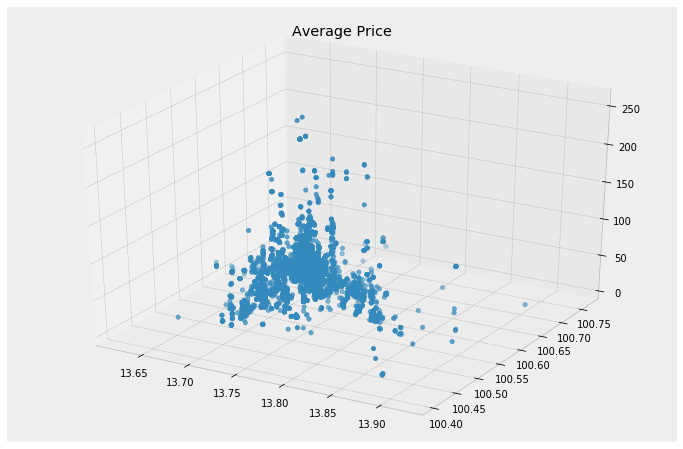

In [49]:
X = BangkokData['Latitude']
Y = BangkokData['Longitude']
Z = BangkokData['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()


### Based on Time

In [48]:
AvgPrice_Bngkok = group_by_date(BangkokData) 
#reate a data object
price_data_Bngkok = go.Scatter(x=AvgPrice_Bngkok.index,y=AvgPrice_Bngkok.values)
#set up the plot layout
layout2 = go.Layout(title='Bangkok_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))
# create a figure and display it
fig2 = go.Figure(data=[price_data_Bngkok],layout=layout2)
#display the plot interactively
iplot(fig2)


### Cairo

In [ ]:
CairoData = read_csvfile(Cairo_CSV)
CairoData.info()
CairoData.head()
list(set(CairoData.dtypes.tolist()))
CairoData_num = CairoData.select_dtypes(include = ['float64', 'int64'])
CairoData_num.hist(figsize=(30, 30), bins=50, xlabelsize=8, ylabelsize=8);

In [128]:
CairoData_corr=CairoData_num.corr()
CairoData_corr

Price  Latitude  Longitude  Beds_int  \
Price                       1.000000 -0.139900   0.112766  0.155787   
Latitude                   -0.139900  1.000000   0.394063  0.049565   
Longitude                   0.112766  0.394063   1.000000 -0.066287   
Beds_int                    0.155787  0.049565  -0.066287  1.000000   
Bedrooms_int                0.180418 -0.001073  -0.104167  0.727412   
Bathrooms_num_int           0.174348 -0.025501  -0.075311  0.609294   
shared_room                -0.415663  0.041747  -0.337510 -0.091055   
shared_bathroom            -0.326417 -0.001175  -0.110541 -0.178185   
Super_host                  0.016063 -0.027620   0.007716 -0.057666   
CheckIn_stars              -0.028501 -0.026943  -0.121476  0.032259   
Accuracy_stars             -0.025663 -0.024076  -0.115624  0.034585   
Cleanliness_stars          -0.012997 -0.026317  -0.112679  0.029952   
Communication_stars        -0.028073 -0.027032  -0.122557  0.032103   
Location_stars             -0.031733 -0.017725  -0.131568  0.032978   
Value_stars                -0.032676 -0.026853  -0.116640  0.031217   
Unnamed: 18                 0.023121  0.002619   0.001978 -0.000433   
Air conditioning            0.178371 -0.051445   0.010312 -0.028348   
BBQ grill                   0.012848 -0.059263   0.052119 -0.015034   
Baby bath                  -0.002331  0.022531  -0.012367  0.009304   
Baby monitor                0.038610  0.054613   0.086647 -0.035572   
Babysitter recommendations  0.074764  0.014135   0.007294  0.012075   
Bathtub                     0.073757 -0.104757  -0.032399  0.042887   
Beach essentials            0.098820  0.080704   0.110617 -0.023009   
Beachfront                  0.051930  0.009131  -0.048378  0.006685   
Bed linens                 -0.005847 -0.094751  -0.010497 -0.059778   
Breakfast                  -0.120305  0.009740  -0.236200  0.013069   
Building staff             -0.031220 -0.061523  -0.131025  0.104140   
Cable TV                    0.098999 -0.025048   0.064834  0.046234   
Carbon monoxide detector    0.056597  0.004251  -0.072230  0.009467   
Changing table              0.006064  0.056042   0.029649  0.012192   
...                              ...       ...        ...       ...   
Paid parking on premises   -0.073048 -0.022193  -0.147693  0.002512   
Patio or balcony            0.009931 -0.074263   0.097088  0.001119   
Pocket wifi                 0.059289 -0.038821  -0.009449  0.026820   
Pool                        0.221303  0.048420   0.088206 -0.020098   
Private entrance            0.045673 -0.027471  -0.015609  0.025533   
Private living room        -0.145245 -0.024005  -0.189745 -0.013973   
Refrigerator               -0.044680 -0.067992  -0.003160 -0.044413   
Room-darkening shades       0.059319  0.037462  -0.001583  0.042021   
Shampoo                     0.006104 -0.089560  -0.016651 -0.023265   
Single level home          -0.017859 -0.011715  -0.019347  0.001667   
Ski-in/Ski-out             -0.022526  0.014413  -0.068163  0.012217   
Smart lock                  0.012247  0.023846  -0.015302  0.018420   
Smoke detector              0.113201  0.016990  -0.091112  0.020687   
Stair gates                 0.020704  0.030424  -0.026554  0.057665   
Stove                      -0.009481 -0.095999   0.012436 -0.041279   
TV                          0.185432 -0.071691   0.120876  0.084811   
Table corner guards        -0.047306 -0.077906  -0.036218 -0.011781   
Washer                     -0.001893 -0.024543   0.002209  0.017826   
Waterfront                  0.055228 -0.099508  -0.022186  0.031713   
Wifi                       -0.074804 -0.118141  -0.198548  0.013213   
Window guards               0.035398  0.026433  -0.000793  0.050084   
air                        -0.006305  0.027367   0.009769 -0.002637   
bunk                       -0.067717  0.055924  -0.030957  0.038564   
couch                      -0.051518  0.029144   0.067719 -0.032567   
double                     -0.020637  0.025720  -0.0014

In [129]:
valuable_feats_Cairo = CairoData_corr['Price'][abs(CairoData_corr['Price']) > 0.5]
valuable_feats_Cairo

Price    1.0
Name: Price, dtype: float64

### Based on Location

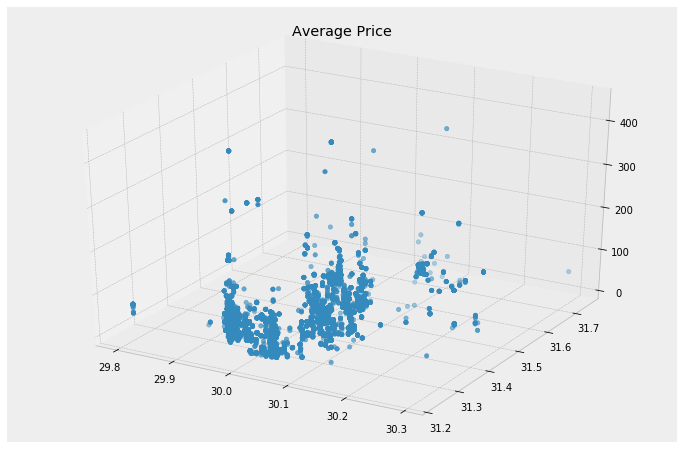

In [52]:
X = CairoData['Latitude']
Y = CairoData['Longitude']
Z = CairoData['Price']

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(111, projection='3d')

#ax = plt.axes(projection='3d')
ax.scatter3D(X,Y,Z)
ax.set_title('Average Price')
plt.show()



### Based on Time

In [51]:
AvgPrice_Cairo = group_by_date(CairoData)
#reate a data object
price_data_Cairo = go.Scatter(x=AvgPrice_Cairo.index,y=AvgPrice_Cairo.values)

#set up the plot layout
layout3 = go.Layout(title='Cairo_ Average Price Plot', xaxis=dict(title='CheckIn_Date'),yaxis=dict(title='Price'))

# create a figure and display it
fig3 = go.Figure(data=[price_data_Cairo],layout=layout3)

#display the plot interactively
iplot(fig3)


surprisingly,with those exploratory plots for the average price,we can see a pretty strong trend for them increasing with time for the three cities. So it looks like as we book later, we can get cheaper deals for renting a house/apartment no matter the month of the year!!  

## Number of Bedrooms, Beds, Bathrooms

### Bangkok

In [141]:
group1_data_Bangkok =  BangkokData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [142]:
group1_data_Bangkok.corr()['Price']

Price                1.000000
Beds_int             0.436478
Bedrooms_int         0.567879
Bathrooms_num_int    0.408320
Name: Price, dtype: float64

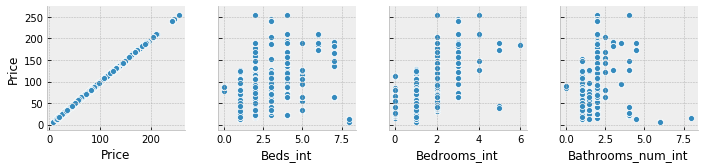

In [143]:
sns.pairplot(data=group1_data_Bangkok,x_vars=group1_data_Bangkok .columns,y_vars=['Price'])

### Cairo

In [144]:
group1_data_cairo =  CairoData_num[['Price','Beds_int', 'Bedrooms_int','Bathrooms_num_int']]

In [145]:
group1_data_cairo.corr()['Price']

Price                1.000000
Beds_int             0.155787
Bedrooms_int         0.180418
Bathrooms_num_int    0.174348
Name: Price, dtype: float64

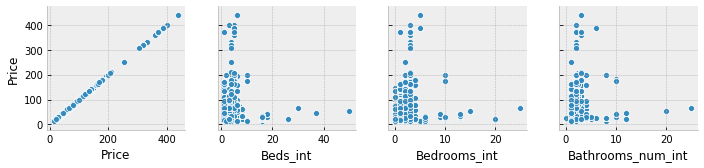

In [146]:
sns.pairplot(data= group1_data_cairo,x_vars= group1_data_cairo.columns,y_vars=['Price'])

# Categorical Features

## which kind of amenities can increase the renting price?! 

### Bangkok

In [190]:
Amenities_list_Bangkok = BangkokData.columns[18:-9]
Amenities_Bangkok = BangkokData[Amenities_list_Bangkok]
Amenities_Bangkok['Price']= BangkokData['Price']
Amenities_Bangkok.head()

Air conditioning  BBQ grill  Baby bath  Baby monitor  \
0                 1          0          0             0   
1                 1          0          0             0   
2                 1          0          0             0   
3                 1          0          0             0   
4                 1          0          0             0   

   Babysitter recommendations  Bathtub  Beach essentials  Beachfront  \
0                           0        0                 0           0   
1                           0        0                 0           0   
2                           0        0                 0           0   
3                           0        0                 0           0   
4                           0        0                 0           0   

   Bed linens  Breakfast  ...    Smoke detector  Stair gates  Stove  TV  \
0           0          0  ...                 1            0      1   1   
1           0          0  ...                 1            0      0   1   
2           1          0  ...                 1            0      0   1   
3           1          1  ...                 1            0      1   1   
4           0          0  ...                 0            0      0   1   

   Table corner guards  Washer  Waterfront  Wifi  Window guards  Price  
0                    0       1           0     1              0   34.0  
1                    0       1           0     1              0   48.0  
2                    0       1           0     1              0   27.0  
3                    0       1           0     1              1   35.0  
4                    0       1           0     1              0   34.0  

[5 rows x 79 columns]

In [191]:
Amenities_Bangkok.corr()['Price']

Air conditioning              0.020883
BBQ grill                     0.061848
Baby bath                     0.113540
Baby monitor                  0.040635
Babysitter recommendations    0.016456
Bathtub                       0.182687
Beach essentials             -0.008279
Beachfront                    0.008222
Bed linens                   -0.002897
Breakfast                     0.095067
Building staff               -0.056486
Cable TV                      0.061822
Carbon monoxide detector      0.116127
Changing table                0.037154
Children’s books and toys     0.115129
Children’s dinnerware         0.021363
Cleaning before checkout     -0.006749
Coffee maker                  0.086583
Cooking basics                0.121277
Crib                          0.317308
Dishes and silverware         0.031455
Dishwasher                    0.081724
Dryer                        -0.075695
EV charger                    0.045482
Elevator                      0.024509
Essentials               

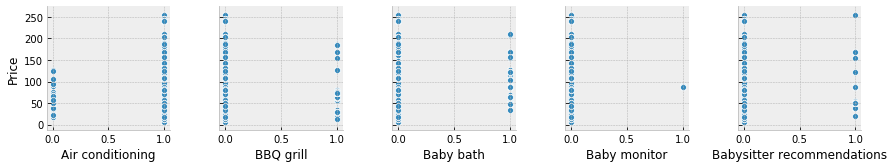

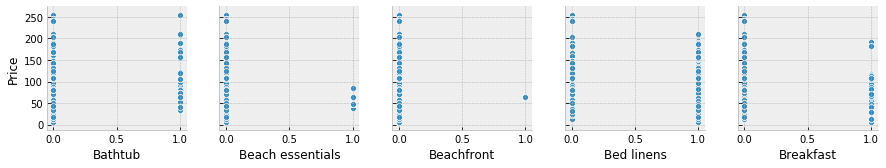

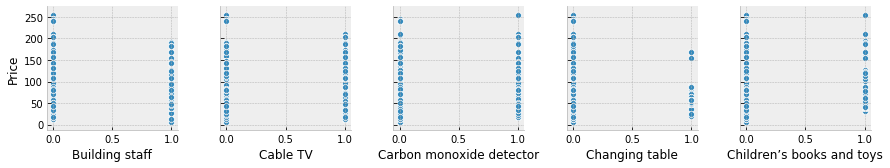

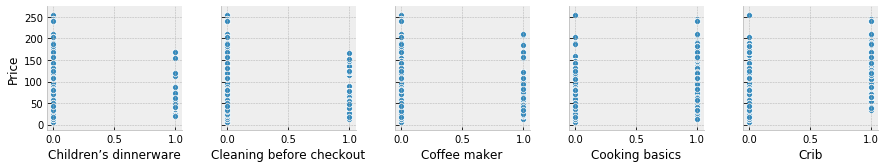

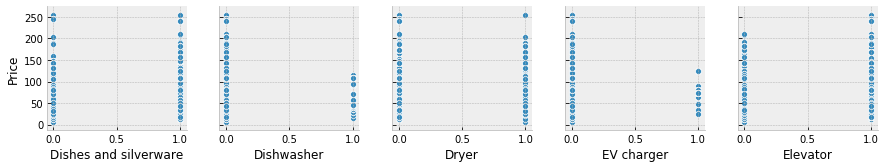

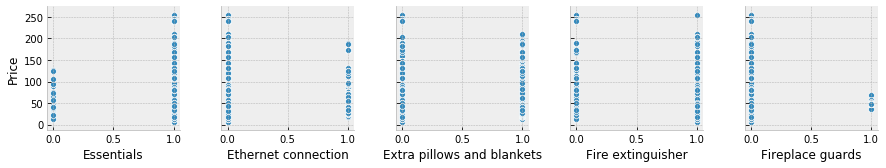

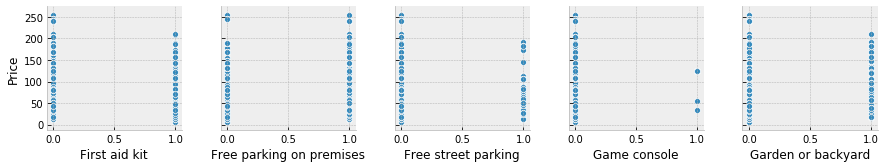

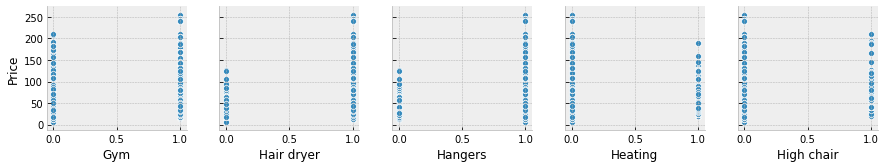

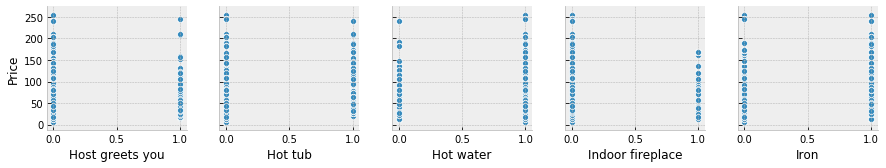

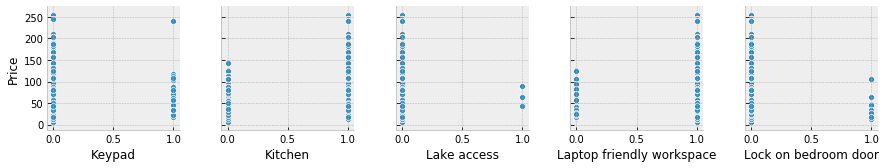

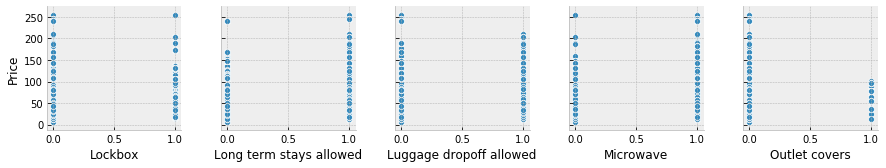

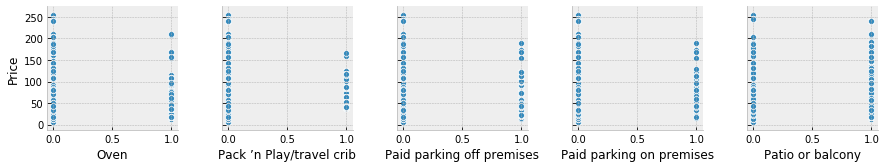

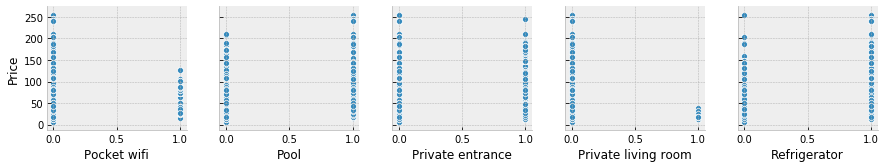

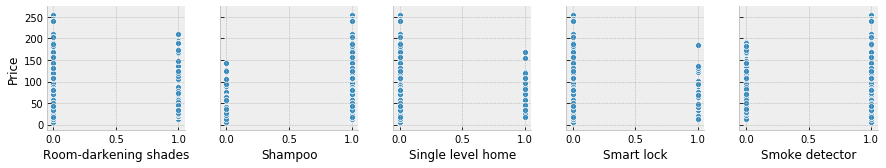

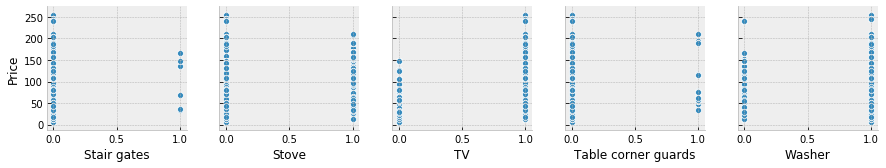

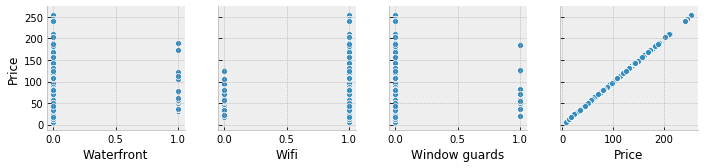

In [192]:
for i in range(0, len(Amenities_Bangkok.columns), 5):
    sns.pairplot(data=Amenities_Bangkok,x_vars=Amenities_Bangkok.columns[i:i+5],y_vars=['Price'])

### Cairo

In [205]:
Amenities_list_Cairo = CairoData.columns[18:-9]
Amenities_list_Cairo

Index(['Air conditioning', 'BBQ grill', 'Baby bath', 'Baby monitor',
       'Babysitter recommendations', 'Bathtub', 'Beach essentials',
       'Beachfront', 'Bed linens', 'Breakfast', 'Building staff', 'Cable TV',
       'Carbon monoxide detector', 'Changing table',
       'Children’s books and toys', 'Children’s dinnerware',
       'Cleaning before checkout', 'Coffee maker', 'Cooking basics', 'Crib',
       'Dishes and silverware', 'Dishwasher', 'Dryer', 'EV charger',
       'Elevator', 'Essentials', 'Ethernet connection',
       'Extra pillows and blankets', 'Fire extinguisher', 'Fireplace guards',
       'First aid kit', 'Free parking on premises', 'Free street parking',
       'Game console', 'Garden or backyard', 'Gym', 'Hair dryer', 'Hangers',
       'Heating', 'High chair', 'Host greets you', 'Hot tub', 'Hot water',
       'Indoor fireplace', 'Iron', 'Keypad', 'Kitchen', 'Lake access',
       'Laptop friendly workspace', 'Lock on bedroom door', 'Lockbox',
       'Long term stay

In [206]:
Amenities_Cairo = CairoData_num[Amenities_list_NY]
Amenities_Cairo['Price']= CairoData['Price']
Amenities_Cairo.head()

Air conditioning  BBQ grill  Baby bath  Baby monitor  \
0                 1          0          0             0   
1                 0          0          0             0   
2                 1          0          0             0   
3                 1          0          0             0   
4                 1          0          0             0   

   Babysitter recommendations  Bathtub  Beach essentials  Beachfront  \
0                           0        0                 0           0   
1                           0        1                 0           0   
2                           1        0                 0           0   
3                           0        0                 0           0   
4                           0        0                 0           0   

   Bed linens  Breakfast  ...    Smoke detector  Stair gates  Stove  TV  \
0           0          1  ...                 1            0      0   1   
1           0          0  ...                 0            0      1   1   
2           1          1  ...                 0            0      0   1   
3           0          0  ...                 1            0      0   1   
4           1          0  ...                 0            0      1   1   

   Table corner guards  Washer  Waterfront  Wifi  Window guards  Price  
0                    0       1           0     1              0   15.0  
1                    0       1           0     1              1   12.0  
2                    0       1           0     1              0   22.0  
3                    0       1           0     1              0   19.0  
4                    0       1           0     1              0   23.0  

[5 rows x 80 columns]

In [207]:
Amenities_Cairo.corr()['Price']

Air conditioning              0.178371
BBQ grill                     0.012848
Baby bath                    -0.002331
Baby monitor                  0.038610
Babysitter recommendations    0.074764
Bathtub                       0.073757
Beach essentials              0.098820
Beachfront                    0.051930
Bed linens                   -0.005847
Breakfast                    -0.120305
Building staff               -0.031220
Cable TV                      0.098999
Carbon monoxide detector      0.056597
Changing table                0.006064
Children’s books and toys     0.033621
Children’s dinnerware         0.133335
Cleaning before checkout     -0.064979
Coffee maker                 -0.009043
Cooking basics               -0.037265
Crib                          0.010958
Dishes and silverware        -0.019615
Dishwasher                    0.115372
Dryer                        -0.015118
EV charger                    0.098820
Elevator                      0.027888
Essentials               

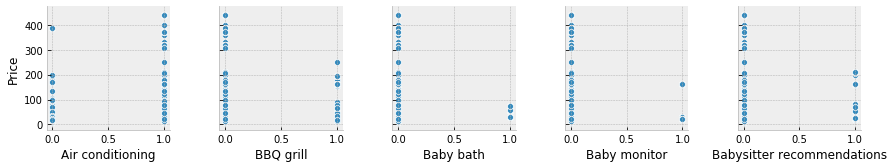

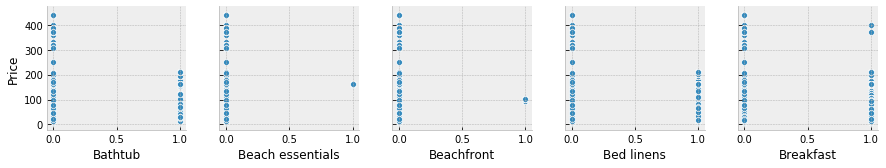

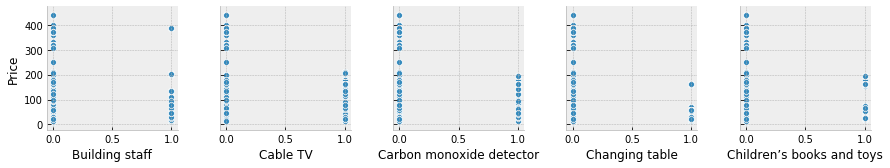

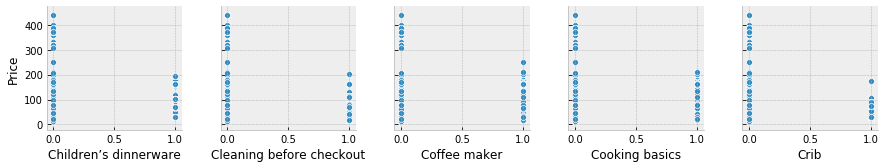

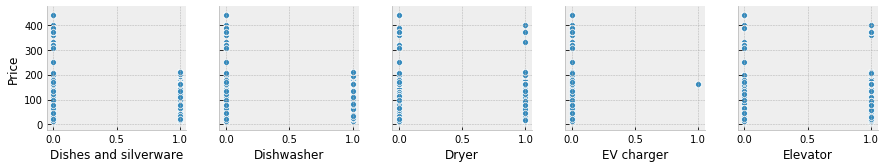

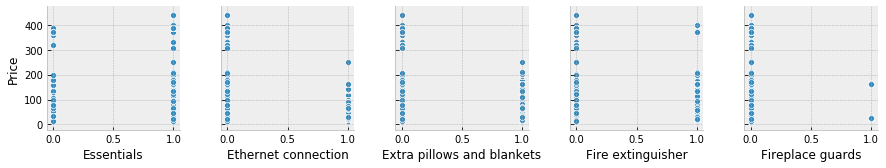

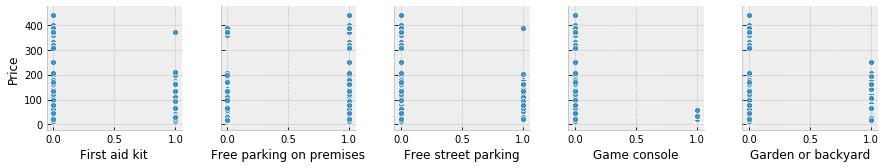

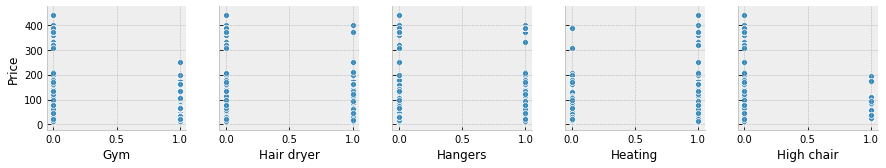

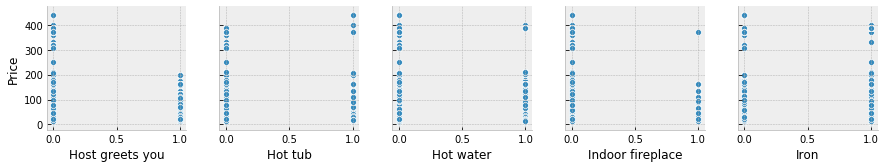

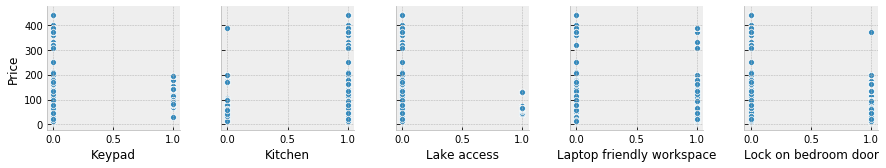

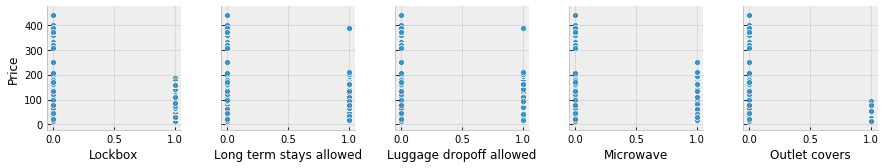

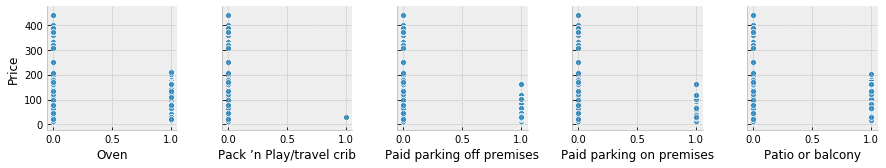

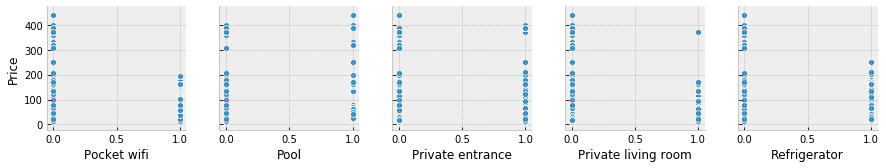

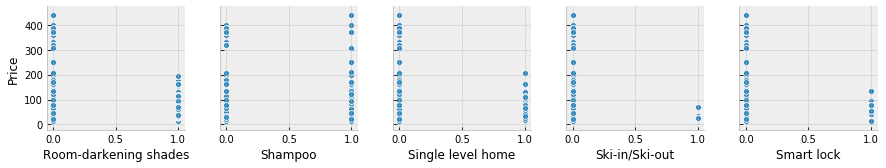

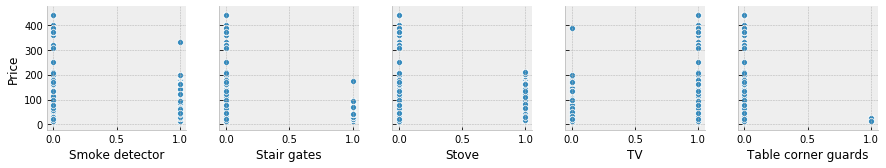

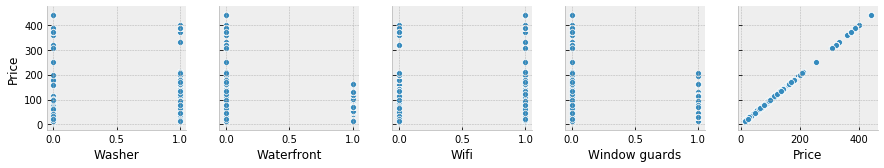

In [208]:
for i in range(0, len(Amenities_Cairo.columns), 5):
    sns.pairplot(data=Amenities_Cairo,x_vars=Amenities_Cairo.columns[i:i+5],y_vars=['Price'])

## Can the bed type affect the corresponding renting price

### Bangkok

In [159]:
BangkokData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=105)

In [161]:
bed_data_Bangkok = BangkokData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [162]:
bed_data_Bangkok.corr()['Price']

Price     1.000000
air      -0.025132
bunk     -0.097638
couch    -0.056817
double   -0.049804
floor    -0.053945
king      0.287205
queen    -0.111464
single   -0.099705
sofa     -0.064032
Name: Price, dtype: float64

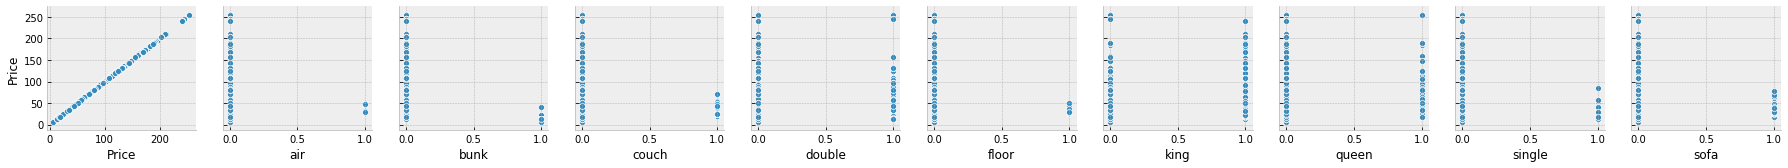

In [163]:
sns.pairplot(data= bed_data_Bangkok,x_vars=bed_data_Bangkok.columns,y_vars=['Price'])

### Cairo

In [165]:
CairoData.columns

Index(['Price', 'CheckIn', 'CheckOut', 'Latitude', 'Longitude', 'Beds_int',
       'Bedrooms_int', 'Bathrooms_num_int', 'shared_room', 'shared_bathroom',
       ...
       'Window guards', 'air', 'bunk', 'couch', 'double', 'floor', 'king',
       'queen', 'single', 'sofa'],
      dtype='object', length=106)

In [166]:
bed_data_Cairo = CairoData[['Price','air', 'bunk', 'couch', 'double', 'floor', 'king','queen', 'single', 'sofa']]

In [167]:
bed_data_Cairo.corr()['Price']

Price     1.000000
air      -0.006305
bunk     -0.067717
couch    -0.051518
double   -0.020637
floor    -0.018169
king      0.167372
queen     0.123536
single   -0.144145
sofa      0.005020
Name: Price, dtype: float64

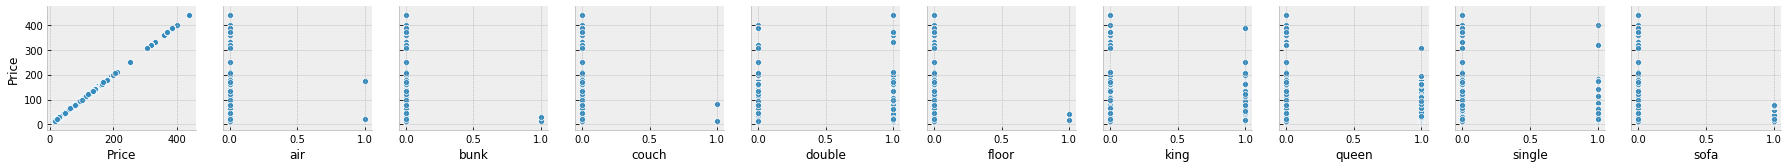

In [168]:
sns.pairplot(data= bed_data_Cairo,x_vars=bed_data_Cairo.columns,y_vars=['Price'])

For the three cities,it looks like we have higher renting prices having special kinds of beds such as "double", "single","king", and "queen" than with other types of beds!

## What is about the number of review stars?!

In [214]:
ReviewStarsNY_List = NewYorkData.columns[11:17]
ReviewStarsNY_List

ReviewStarsNY = NewYorkData_num[ReviewStarsNY_List]
ReviewStarsNY['Price'] = NewYorkData_num['Price']
ReviewStarsNY.head()

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [219]:
ReviewStarsNY = NewYorkData_num[ReviewStarsNY_List]
ReviewStarsNY['Price'] = NewYorkData_num['Price']
ReviewStarsNY.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            5.0             5.0                5.0                  5.0   
1            4.5             4.5                4.0                  4.5   
2            5.0             5.0                5.0                  5.0   
3            5.0             5.0                5.0                  5.0   
4            5.0             5.0                5.0                  5.0   

   Location_stars  Value_stars  Price  
0             5.0          4.5  244.0  
1             5.0          4.0   62.0  
2             4.5          5.0   44.0  
3             5.0          5.0   78.0  
4             4.5          5.0   80.0

In [220]:
ReviewStarsNY.corr()['Price']


CheckIn_stars          0.010759
Accuracy_stars         0.024116
Cleanliness_stars      0.040625
Communication_stars    0.023310
Location_stars         0.072164
Value_stars            0.003400
Price                  1.000000
Name: Price, dtype: float64

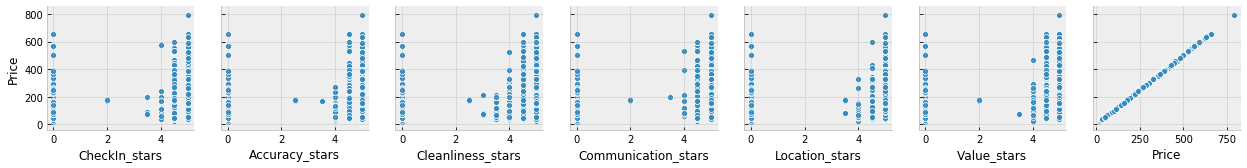

In [221]:
sns.pairplot(data= ReviewStarsNY,x_vars= ReviewStarsNY.columns,y_vars=['Price'])

### Bangkok

In [222]:
ReviewStarsBangkok_List = BangkokData.columns[11:17]
ReviewStarsBangkok_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [223]:
ReviewStarsBangkok = BangkokData[ReviewStarsBangkok_List]
ReviewStarsBangkok['Price'] = BangkokData['Price']
ReviewStarsBangkok.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            5.0             5.0                4.5                  5.0   
1            0.0             0.0                0.0                  0.0   
2            5.0             5.0                5.0                  5.0   
3            5.0             5.0                4.5                  5.0   
4            0.0             0.0                0.0                  0.0   

   Location_stars  Value_stars  Price  
0             5.0          5.0   34.0  
1             0.0          0.0   48.0  
2             4.0          4.5   27.0  
3             5.0          5.0   35.0  
4             0.0          0.0   34.0

In [224]:
ReviewStarsBangkok.corr()['Price']


CheckIn_stars          0.053555
Accuracy_stars         0.053265
Cleanliness_stars      0.051520
Communication_stars    0.051650
Location_stars         0.086565
Value_stars            0.042335
Price                  1.000000
Name: Price, dtype: float64

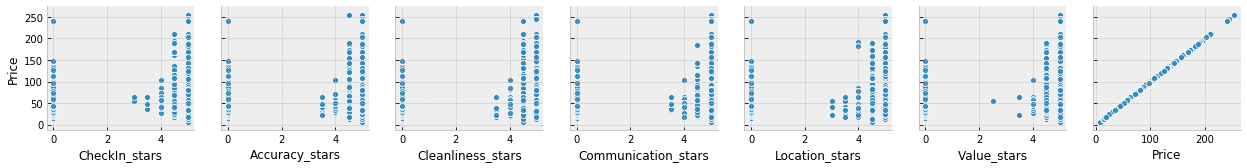

In [225]:
sns.pairplot(data= ReviewStarsBangkok,x_vars= ReviewStarsBangkok.columns,y_vars=['Price'])

### Cairo

In [226]:
ReviewStarsCairo_List = CairoData.columns[11:17]
ReviewStarsCairo_List

Index(['CheckIn_stars', 'Accuracy_stars', 'Cleanliness_stars',
       'Communication_stars', 'Location_stars', 'Value_stars'],
      dtype='object')

In [227]:
ReviewStarsCairo = CairoData[ReviewStarsCairo_List]
ReviewStarsCairo['Price'] = CairoData['Price']
ReviewStarsCairo.head()

CheckIn_stars  Accuracy_stars  Cleanliness_stars  Communication_stars  \
0            0.0             0.0                0.0                  0.0   
1            0.0             0.0                0.0                  0.0   
2            5.0             4.0                3.5                  5.0   
3            5.0             5.0                5.0                  5.0   
4            0.0             0.0                0.0                  0.0   

   Location_stars  Value_stars  Price  
0             0.0          0.0   15.0  
1             0.0          0.0   12.0  
2             4.5          4.0   22.0  
3             5.0          5.0   19.0  
4             0.0          0.0   23.0

In [228]:
ReviewStarsCairo.corr()['Price']

CheckIn_stars         -0.028501
Accuracy_stars        -0.025663
Cleanliness_stars     -0.012997
Communication_stars   -0.028073
Location_stars        -0.031733
Value_stars           -0.032676
Price                  1.000000
Name: Price, dtype: float64

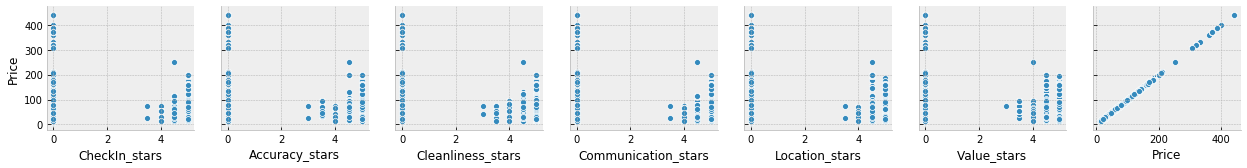

In [229]:
sns.pairplot(data= ReviewStarsCairo,x_vars= ReviewStarsCairo.columns,y_vars=['Price'])

### Rest of Features

In [250]:
# Shared_room has 3 levels
## Entire house/apartment = 0
## Shared room = 1
## Private room = 2

### NewYork

In [234]:
NY_rest = NewYorkData[['shared_room', 'shared_bathroom', 'Super_host']]
NY_rest['Price']= NewYorkData['Price']
NY_rest.head()

shared_room  shared_bathroom  Super_host  Price
0            0                0           1  244.0
1            2                1           1   62.0
2            2                1           1   44.0
3            2                1           1   78.0
4            2                1           1   80.0

In [251]:
NY_rest.corr()['Price']

shared_room       -0.633473
shared_bathroom   -0.511981
Super_host         0.084713
Price              1.000000
Name: Price, dtype: float64

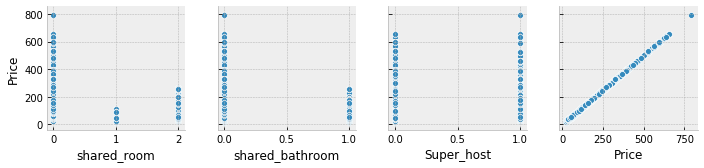

In [252]:
sns.pairplot(data= NY_rest,x_vars= NY_rest.columns,y_vars=['Price'])

### Bangkok

In [235]:
Bangkok_rest = BangkokData[['shared_room', 'shared_bathroom', 'Super_host']]
Bangkok_rest['Price']= BangkokData['Price']
Bangkok_rest.head()

shared_room  shared_bathroom  Super_host  Price
0          0.0                0           1   34.0
1          0.0                0           0   48.0
2          0.0                0           1   27.0
3          0.0                0           0   35.0
4          0.0                0           1   34.0

In [253]:
Bangkok_rest.corr()['Price']

shared_room       -0.179574
shared_bathroom   -0.149778
Super_host         0.180583
Price              1.000000
Name: Price, dtype: float64

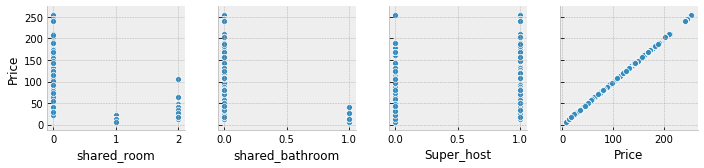

In [254]:
sns.pairplot(data= Bangkok_rest,x_vars= Bangkok_rest.columns,y_vars=['Price'])

### Cairo

In [236]:
Cairo_rest = CairoData[['shared_room', 'shared_bathroom', 'Super_host']]
Cairo_rest['Price']= CairoData['Price']
Cairo_rest.head()

shared_room  shared_bathroom  Super_host  Price
0            2                1           0   15.0
1            0                0           0   12.0
2            2                1           0   22.0
3            2                0           0   19.0
4            2                1           0   23.0

In [255]:
Cairo_rest.corr()['Price']

shared_room       -0.415663
shared_bathroom   -0.326417
Super_host         0.016063
Price              1.000000
Name: Price, dtype: float64

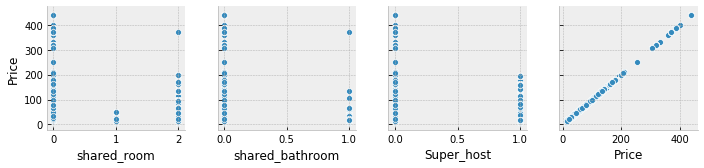

In [256]:
sns.pairplot(data= Cairo_rest,x_vars= Cairo_rest.columns,y_vars=['Price'])